In [2]:
import matplotlib.pyplot as plt
import json
import numpy as np
import glob

import pandas as pd

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
# colors1 = ['#073B4C', '#FFD166', '#EF476F', '#06D6A0',  '#118AB2', '#4D4C7D', '#FFDAC0', '#F54952']
colors1 = ['#073B4C', '#FFD166', '#EF476F', '#06D6A0',  '#118AB2', '#4D4C7D', '#FFDAC0', '#F54952']
colors2 = ['#dd3497', '#ae017e', '#7a0177', '#49006a'] # red-purple
warm_colors= ['#C2E4FF', '#2a2a72', '#009ffd', '#ffa400']
cold_colors = ['#DBDFFD', '#9BA3EB', '#646FD4', '#242F9B']

fewshot_colors = ['#dd3497', '#ae017e', '#7a0177','#9BA3EB']
fewshot_with_noise_colors = ['#dd3497', '#ae017e', '#7a0177','#EF476F','#9BA3EB']
wordprompt_colors = ['#DBDFFD', '#9BA3EB', '#646FD4', '#242F9B','#2a2a72']

# colors1 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] # for few-shot prompting evaluation
# colors2 = ['#0057a8', '#f83b36', '#79b84e', '#ff80ed', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] # for comparing nanogpt and gpt2

# NanoGPT Model

## Algorithmic Reasoning Accuracy

In [6]:
csv_list =glob.glob('out/shakespeare_add_ar_mixed/eval*/*.csv')
print(csv_list)

['out/shakespeare_add_ar_mixed/eval_ar3000_3shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_ar3000_1shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv', 'out/shakespeare_add_ar_mixed/eval_word_prompt_ar3000_multiple/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_ar3000_2shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_word_prompt_add10000_multiple/result.csv']


['out/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_word_prompt_add10000_multiple/result.csv']
out/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv
out/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv
out/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv
out/shakespeare_add_ar_mixed/eval_word_prompt_add10000_multiple/result.csv


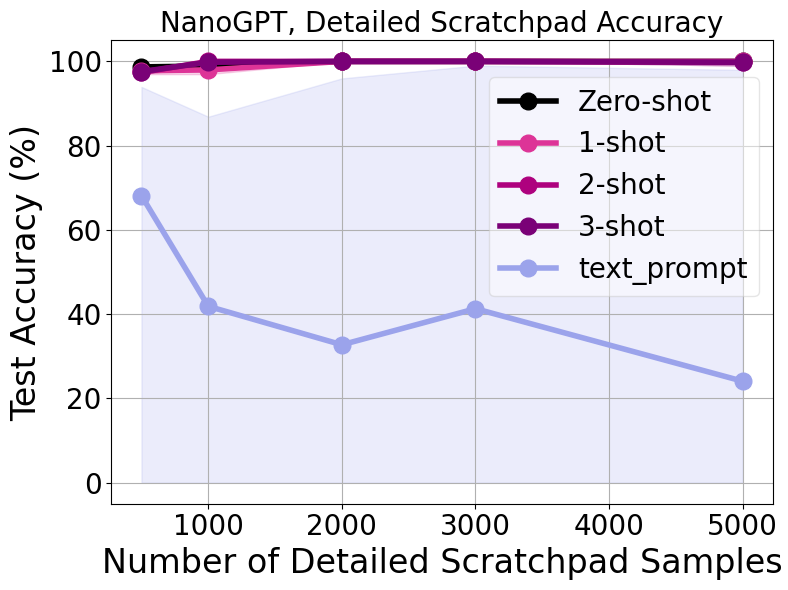

In [69]:
model='nanogpt'
name='mixed_ar_accuracy'
prompts = ['1shot', '2shot', '3shot','word_prompt']
label = ['1-shot', '2-shot', '3-shot', 'text_prompt']

plt.figure(figsize=(8,6))
colors = fewshot_colors

csv_list =glob.glob('out/shakespeare_add_ar_mixed/eval_*add10000*/*.csv')
print(csv_list)

zero_file = 'out/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_ar'].unique()
df_mean = df.groupby('num_ar').mean()
df_min = df.groupby('num_ar').min()
df_max = df.groupby('num_ar').max()

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12)
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_ar').mean()
    df_min = df.groupby('num_ar').min()
    df_max = df.groupby('num_ar').max()

    plt.plot(df_mean.index, df_mean['mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    plt.fill_between(df_mean.index, df_min['this_mean_accuracy'], df_max['this_mean_accuracy'], alpha=0.2, color=colors[i])

plt.title("NanoGPT, Detailed Scratchpad Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(0, 100)
plt.xlabel('Number of Detailed Scratchpad Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='upper right', fontsize=20, framealpha=0.5, bbox_to_anchor=(1, 0.95))
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_word_prompt_add10000_multiple/result.csv']
out/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv
out/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv
out/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv
out/shakespeare_add_ar_mixed/eval_word_prompt_add10000_multiple/result.csv


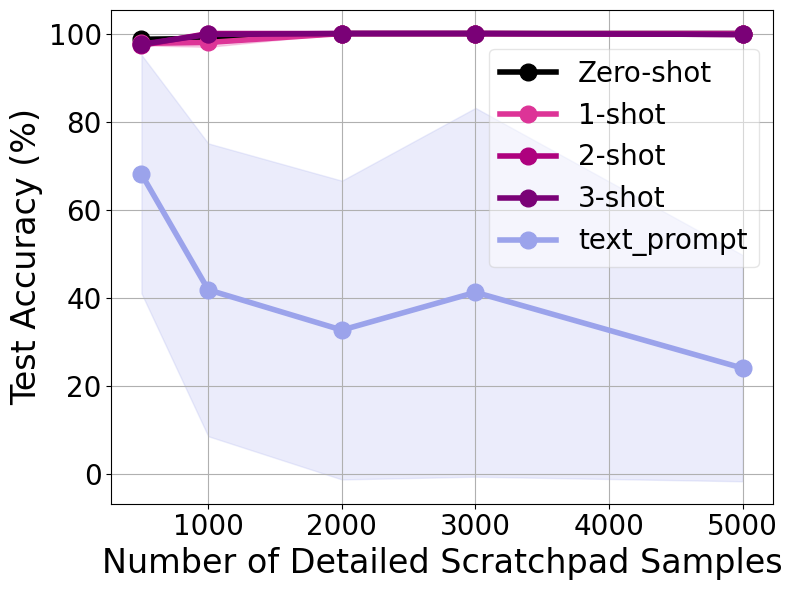

In [68]:
model='nanogpt'
name='mixed_ar_accuracy'
prompts = ['1shot', '2shot', '3shot','word_prompt']
label = ['1-shot', '2-shot', '3-shot', 'text_prompt']

plt.figure(figsize=(8,6))
colors = fewshot_colors

csv_list =glob.glob('out/shakespeare_add_ar_mixed/eval_*add10000*/*.csv')
print(csv_list)

zero_file = 'out/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_ar'].unique()
df_mean = df.groupby('num_ar').mean()
df_min = df.groupby('num_ar').min()
df_max = df.groupby('num_ar').max()

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12)
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_ar').mean()
    df_std = df.groupby('num_ar').std()

    plt.plot(df_mean.index, df_mean['mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    plt.fill_between(df_mean.index, df_mean['mean_accuracy']-df_std['this_mean_accuracy'], df_mean['mean_accuracy']+df_std['this_mean_accuracy'], alpha=0.2, color=colors[i])

# plt.title("NanoGPT, Detailed Scratchpad Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(0, 100)
plt.xlabel('Number of Detailed Scratchpad Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='upper right', fontsize=20, framealpha=0.5, bbox_to_anchor=(1, 0.95))
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}2.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

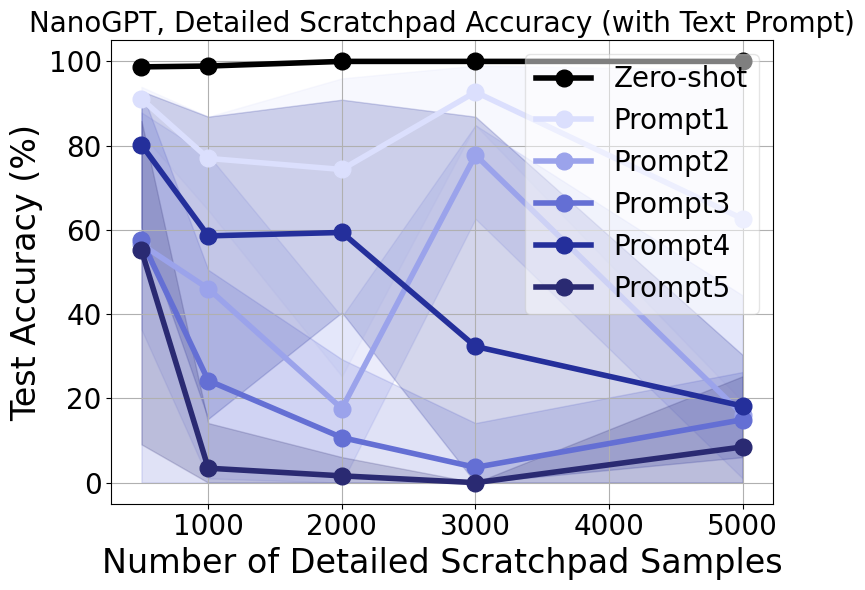

In [63]:
model='nanogpt'
name='mixed_text_prompt_ar'
label = ['Prompt1', 'Prompt2', 'Prompt3', 'Prompt4', 'Prompt5']

zero_file = 'out/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_ar'].unique()
df_mean = df.groupby('num_ar').mean()
df_min = df.groupby('num_ar').min()
df_max = df.groupby('num_ar').max()

plt.figure(figsize=(8,6))
colors = wordprompt_colors

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12)
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

word_file = 'out/shakespeare_add_ar_mixed/eval_word_prompt_add10000_multiple/result.csv'
df = pd.read_csv(f'{word_file}')
for i in range(5):
    df_mean = df[df.prompt_set_num == i+1].groupby('num_ar').mean()
    df_min = df[df.prompt_set_num == i+1].groupby('num_ar').min()
    df_max = df[df.prompt_set_num == i+1].groupby('num_ar').max()

    plt.plot(df_mean.index, df_mean['this_mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    plt.fill_between(df_mean.index, df_min['this_mean_accuracy'], df_max['this_mean_accuracy'], alpha=0.2, color=colors[i])

plt.title("NanoGPT, Detailed Scratchpad Accuracy (with Text Prompt)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Detailed Scratchpad Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='upper right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

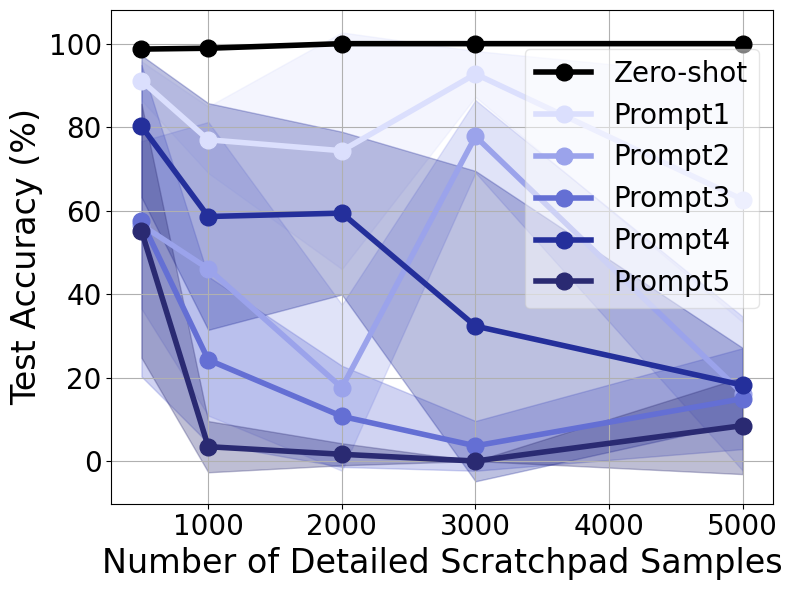

In [67]:
model='nanogpt'
name='mixed_text_prompt_ar'
label = ['Prompt1', 'Prompt2', 'Prompt3', 'Prompt4', 'Prompt5']

zero_file = 'out/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_ar'].unique()
df_mean = df.groupby('num_ar').mean()
df_min = df.groupby('num_ar').min()
df_max = df.groupby('num_ar').max()

plt.figure(figsize=(8,6))
colors = wordprompt_colors

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12)
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

word_file = 'out/shakespeare_add_ar_mixed/eval_word_prompt_add10000_multiple/result.csv'
df = pd.read_csv(f'{word_file}')
for i in range(5):
    df_mean = df[df.prompt_set_num == i+1].groupby('num_ar').mean()
    df_std = df[df.prompt_set_num == i+1].groupby('num_ar').std()

    plt.plot(df_mean.index, df_mean['this_mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    plt.fill_between(df_mean.index, df_mean['this_mean_accuracy']-df_std['this_mean_accuracy'], df_mean['this_mean_accuracy']+df_std['this_mean_accuracy'], alpha=0.3, color=colors[i])


# plt.title("NanoGPT, Detailed Scratchpad Accuracy (with Text Prompt)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Detailed Scratchpad Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='upper right', fontsize=20, framealpha=0.5, bbox_to_anchor=(1, 0.95))
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}2.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

## Addition Accuracy

['out/shakespeare_add_ar_mixed/eval_ar3000_3shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_ar3000_1shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv', 'out/shakespeare_add_ar_mixed/eval_word_prompt_ar3000_multiple/result.csv', 'out/shakespeare_add_ar_mixed/eval_ar3000_2shot/result.csv']
out/shakespeare_add_ar_mixed/eval_ar3000_1shot/result.csv
out/shakespeare_add_ar_mixed/eval_ar3000_2shot/result.csv
out/shakespeare_add_ar_mixed/eval_ar3000_3shot/result.csv
out/shakespeare_add_ar_mixed/eval_word_prompt_ar3000_multiple/result.csv


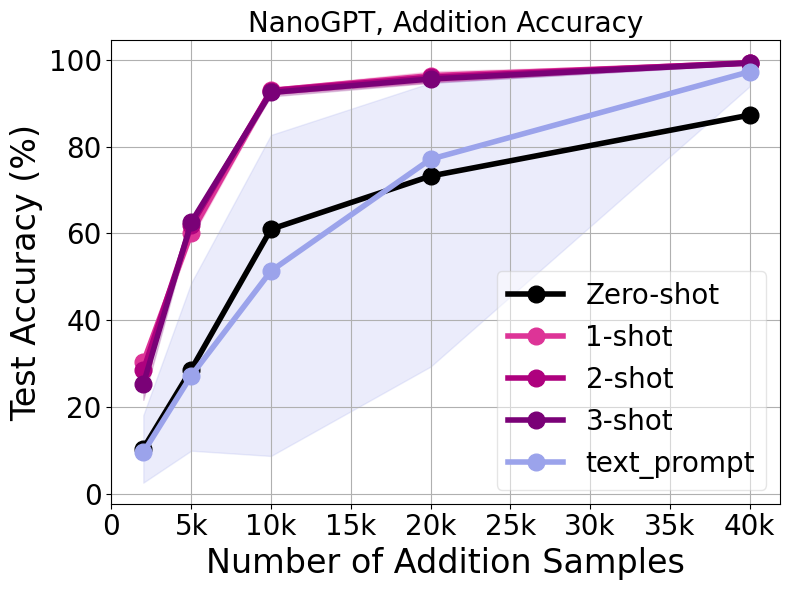

In [70]:
model='nanogpt'
name='mixed_add_accuracy'

prompts = ['1shot', '2shot', '3shot','word_prompt']
label = ['1-shot', '2-shot', '3-shot', 'text_prompt']

plt.figure(figsize=(8,6))
colors = fewshot_colors

csv_list =glob.glob('out/shakespeare_add_ar_mixed/eval_*ar3000*/*.csv')
print(csv_list)

zero_file = 'out/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_add'].unique()
df_mean = df.groupby('num_add').mean()
df_min = df.groupby('num_add').min()
df_max = df.groupby('num_add').max()

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12)
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_add').mean()
    df_min = df.groupby('num_add').min()
    df_max = df.groupby('num_add').max()

    plt.plot(df_mean.index, df_mean['mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    plt.fill_between(df_mean.index, df_min['this_mean_accuracy'], df_max['this_mean_accuracy'], alpha=0.2, color=colors[i])

plt.title("NanoGPT, Addition Accuracy", fontsize=20)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Addition Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out/shakespeare_add_ar_mixed/eval_ar3000_3shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_ar3000_1shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv', 'out/shakespeare_add_ar_mixed/eval_word_prompt_ar3000_multiple/result.csv', 'out/shakespeare_add_ar_mixed/eval_ar3000_2shot/result.csv']
out/shakespeare_add_ar_mixed/eval_ar3000_1shot/result.csv
out/shakespeare_add_ar_mixed/eval_ar3000_2shot/result.csv
out/shakespeare_add_ar_mixed/eval_ar3000_3shot/result.csv
out/shakespeare_add_ar_mixed/eval_word_prompt_ar3000_multiple/result.csv


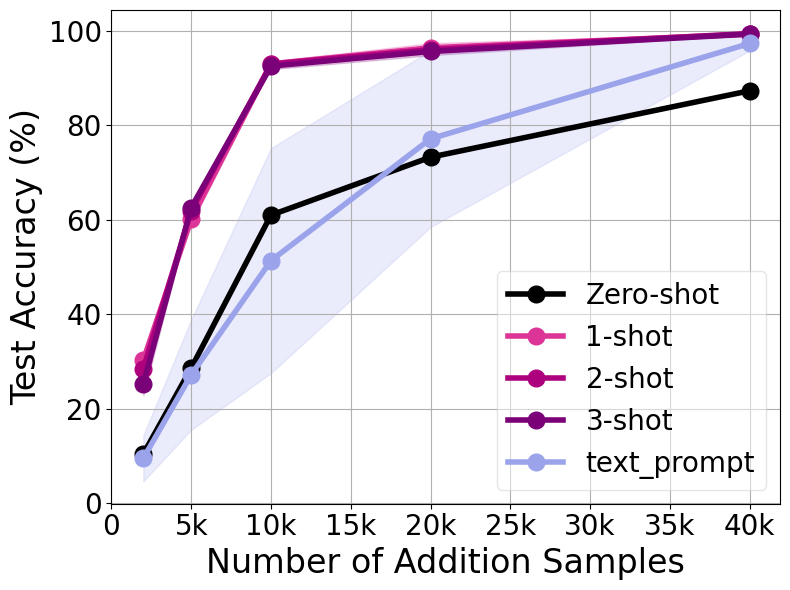

In [71]:
model='nanogpt'
name='mixed_add_accuracy'

prompts = ['1shot', '2shot', '3shot','word_prompt']
label = ['1-shot', '2-shot', '3-shot', 'text_prompt']

plt.figure(figsize=(8,6))
colors = fewshot_colors

csv_list =glob.glob('out/shakespeare_add_ar_mixed/eval_*ar3000*/*.csv')
print(csv_list)

zero_file = 'out/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_add'].unique()
df_mean = df.groupby('num_add').mean()
df_min = df.groupby('num_add').min()
df_max = df.groupby('num_add').max()

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12)
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_add').mean()
    df_std = df.groupby('num_add').std()

    plt.plot(df_mean.index, df_mean['mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    plt.fill_between(df_mean.index, df_mean['mean_accuracy']-df_std['this_mean_accuracy'], df_mean['mean_accuracy']+df_std['this_mean_accuracy'], alpha=0.2, color=colors[i])

# plt.title("NanoGPT, Addition Accuracy", fontsize=20)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Addition Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}2.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

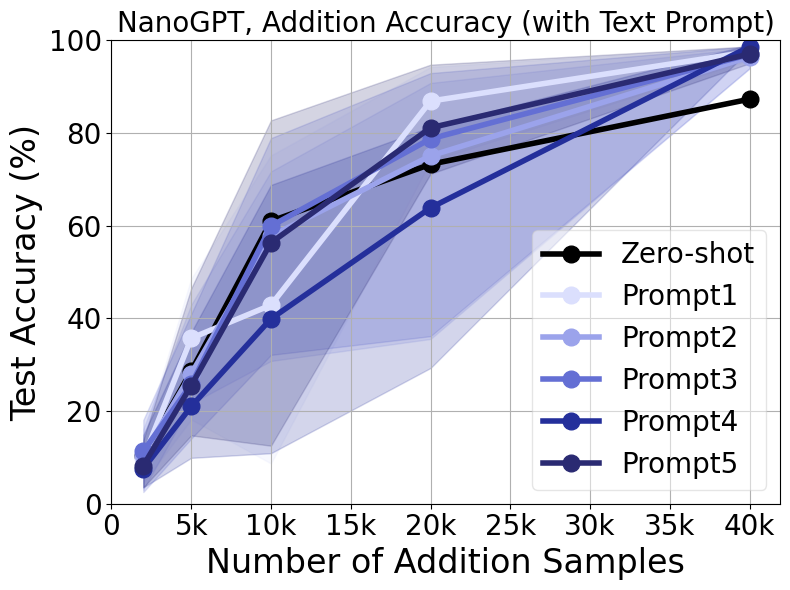

In [72]:
model='nanogpt'
name='mixed_text_prompt_add'

label = ['Prompt1', 'Prompt2', 'Prompt3', 'Prompt4', 'Prompt5']

zero_file = 'out/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_add'].unique()
df_mean = df.groupby('num_add').mean()
df_min = df.groupby('num_add').min()
df_max = df.groupby('num_add').max()

plt.figure(figsize=(8,6))
colors = wordprompt_colors

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12)
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

word_file = 'out/shakespeare_add_ar_mixed/eval_word_prompt_ar3000_multiple/result.csv'
df = pd.read_csv(f'{word_file}')
for i in range(5):
    df_mean = df[df.prompt_set_num == i+1].groupby('num_add').mean()
    df_min = df[df.prompt_set_num == i+1].groupby('num_add').min()
    df_max = df[df.prompt_set_num == i+1].groupby('num_add').max()

    plt.plot(df_mean.index, df_mean['this_mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    plt.fill_between(df_mean.index, df_min['this_mean_accuracy'], df_max['this_mean_accuracy'], alpha=0.2, color=colors[i])

plt.title("NanoGPT, Addition Accuracy (with Text Prompt)", fontsize=20)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.ylim([0,100])
plt.yticks(fontsize=20)
plt.xlabel('Number of Addition Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

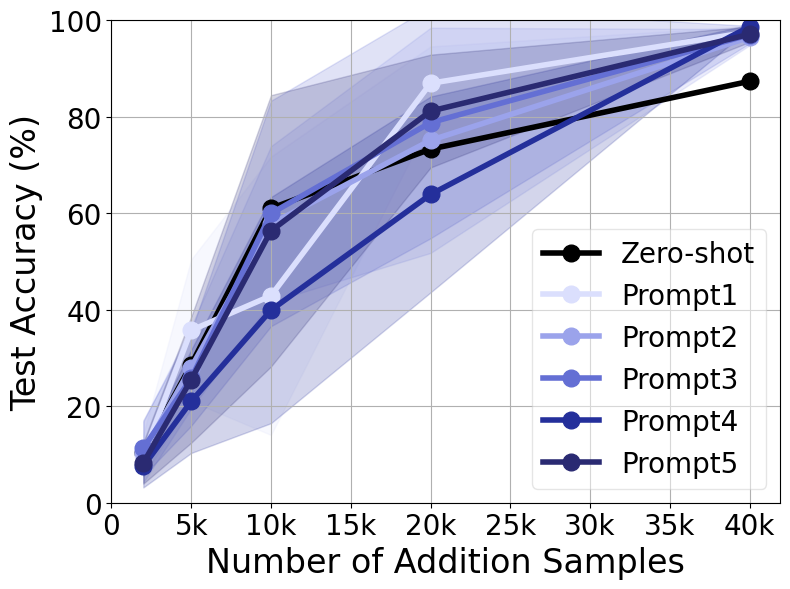

In [73]:
model='nanogpt'
name='mixed_text_prompt_add'

label = ['Prompt1', 'Prompt2', 'Prompt3', 'Prompt4', 'Prompt5']

zero_file = 'out/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_add'].unique()
df_mean = df.groupby('num_add').mean()
df_min = df.groupby('num_add').min()
df_max = df.groupby('num_add').max()

plt.figure(figsize=(8,6))
colors = wordprompt_colors

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12)
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

word_file = 'out/shakespeare_add_ar_mixed/eval_word_prompt_ar3000_multiple/result.csv'
df = pd.read_csv(f'{word_file}')
for i in range(5):
    df_mean = df[df.prompt_set_num == i+1].groupby('num_add').mean()
    df_std = df[df.prompt_set_num == i+1].groupby('num_add').std()

    plt.plot(df_mean.index, df_mean['this_mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    plt.fill_between(df_mean.index, df_mean['this_mean_accuracy']-df_std['this_mean_accuracy'], df_mean['this_mean_accuracy']+df_std['this_mean_accuracy'], alpha=0.2, color=colors[i])

# plt.title("NanoGPT, Addition Accuracy (with Text Prompt)", fontsize=20)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.ylim([0,100])
plt.yticks(fontsize=20)
plt.xlabel('Number of Addition Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}2.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

# GPT-2 Model

## Algorithmic Reasoning Accuracy

['out-gpt/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv', 'out-gpt/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv', 'out-gpt/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv', 'out-gpt/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv', 'out-gpt/shakespeare_add_ar_mixed/eval_word_prompt_add10000_multiple/result.csv']
out-gpt/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_word_prompt_add10000_multiple/result.csv


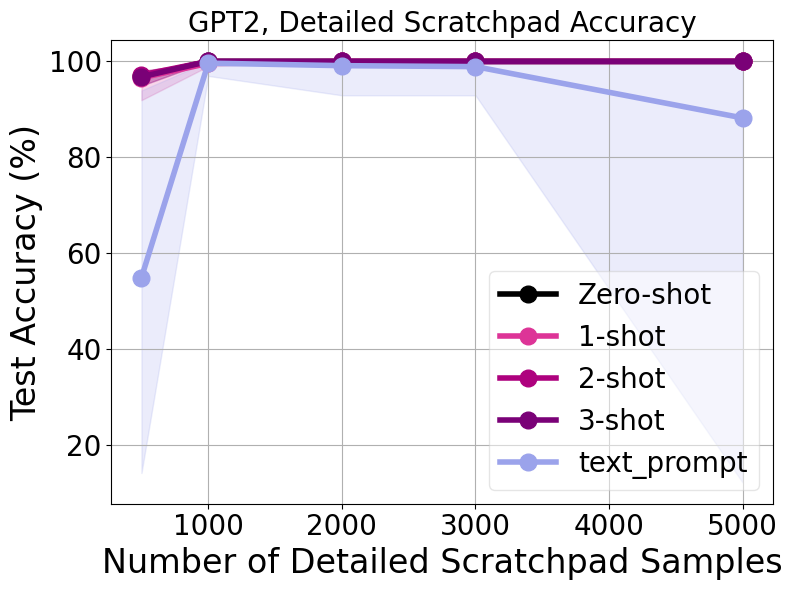

In [74]:
model='gpt2'
name='mixed_ar_accuracy'

prompts = ['1shot', '2shot', '3shot','word_prompt']
label = ['1-shot', '2-shot', '3-shot', 'text_prompt']

plt.figure(figsize=(8,6))
colors = fewshot_colors

csv_list =glob.glob('out-gpt/shakespeare_add_ar_mixed/eval_*add10000*/*.csv')
print(csv_list)

zero_file = 'out-gpt/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_ar'].unique()
df_mean = df.groupby('num_ar').mean()
df_min = df.groupby('num_ar').min()
df_max = df.groupby('num_ar').max()

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12)
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_ar').mean()
    df_min = df.groupby('num_ar').min()
    df_max = df.groupby('num_ar').max()

    plt.plot(df_mean.index, df_mean['mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    plt.fill_between(df_mean.index, df_min['this_mean_accuracy'], df_max['this_mean_accuracy'], alpha=0.2, color=colors[i])

plt.title("GPT2, Detailed Scratchpad Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(0, 100)
plt.xlabel('Number of Detailed Scratchpad Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out-gpt/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv', 'out-gpt/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv', 'out-gpt/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv', 'out-gpt/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv', 'out-gpt/shakespeare_add_ar_mixed/eval_word_prompt_add10000_multiple/result.csv']
out-gpt/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_word_prompt_add10000_multiple/result.csv


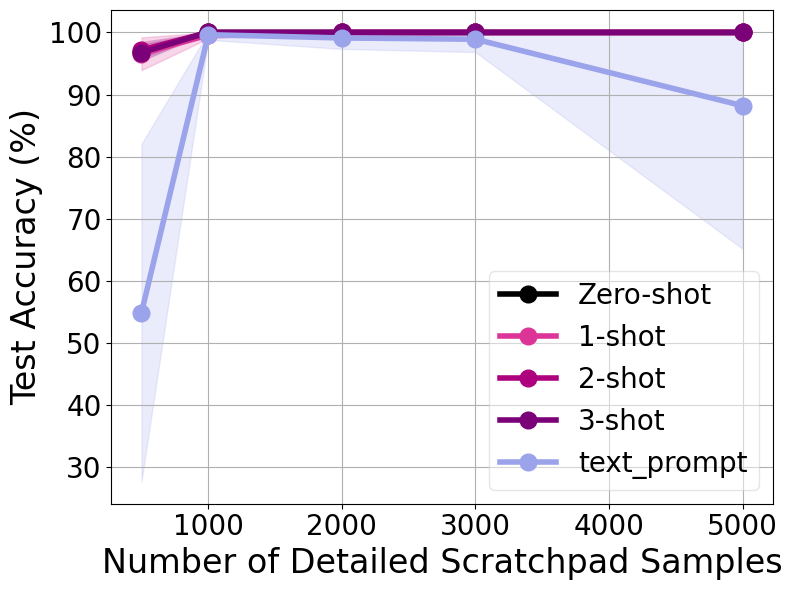

In [75]:
model='gpt2'
name='mixed_ar_accuracy'

prompts = ['1shot', '2shot', '3shot','word_prompt']
label = ['1-shot', '2-shot', '3-shot', 'text_prompt']

plt.figure(figsize=(8,6))
colors = fewshot_colors

csv_list =glob.glob('out-gpt/shakespeare_add_ar_mixed/eval_*add10000*/*.csv')
print(csv_list)

zero_file = 'out-gpt/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_ar'].unique()
df_mean = df.groupby('num_ar').mean()
df_min = df.groupby('num_ar').min()
df_max = df.groupby('num_ar').max()

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12)
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_ar').mean()
    df_std = df.groupby('num_ar').std()

    plt.plot(df_mean.index, df_mean['mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    plt.fill_between(df_mean.index, df_mean['mean_accuracy']-df_std['this_mean_accuracy'],np.clip((df_mean['mean_accuracy']+df_std['this_mean_accuracy']).to_numpy(),a_min=0, a_max=100), alpha=0.2, color=colors[i])
# plt.title("GPT2, Detailed Scratchpad Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(5, 105)
plt.xlabel('Number of Detailed Scratchpad Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}2.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

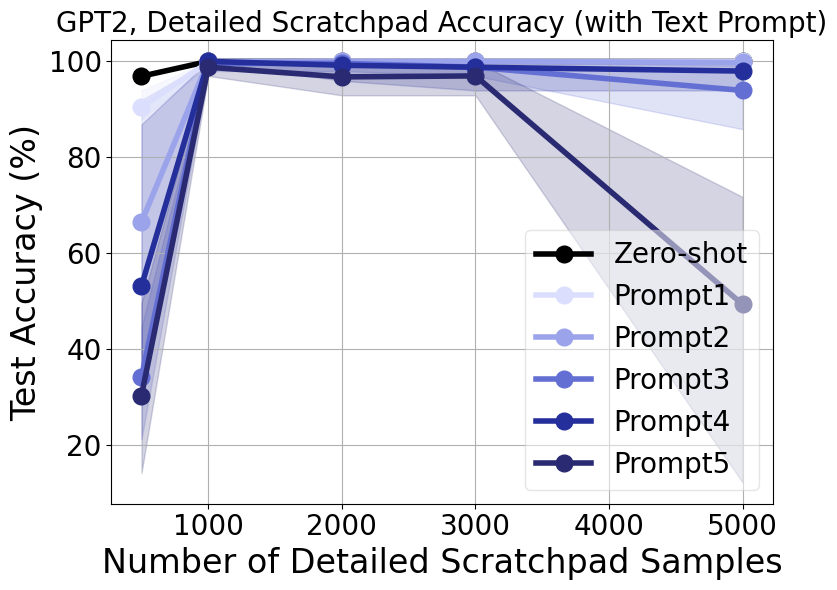

In [76]:
model='gpt2'
name='mixed_text_prompt_ar'

label = ['Prompt1', 'Prompt2', 'Prompt3', 'Prompt4', 'Prompt5']

zero_file = 'out-gpt/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_ar'].unique()
df_mean = df.groupby('num_ar').mean()
df_min = df.groupby('num_ar').min()
df_max = df.groupby('num_ar').max()

plt.figure(figsize=(8,6))
colors = wordprompt_colors

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12)
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

word_file = 'out-gpt/shakespeare_add_ar_mixed/eval_word_prompt_add10000_multiple/result.csv'
df = pd.read_csv(f'{word_file}')
for i in range(5):
    df_mean = df[df.prompt_set_num == i+1].groupby('num_ar').mean()
    df_min = df[df.prompt_set_num == i+1].groupby('num_ar').min()
    df_max = df[df.prompt_set_num == i+1].groupby('num_ar').max()

    plt.plot(df_mean.index, df_mean['this_mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    plt.fill_between(df_mean.index, df_min['this_mean_accuracy'], df_max['this_mean_accuracy'], alpha=0.2, color=colors[i])

plt.title("GPT2, Detailed Scratchpad Accuracy (with Text Prompt)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Detailed Scratchpad Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

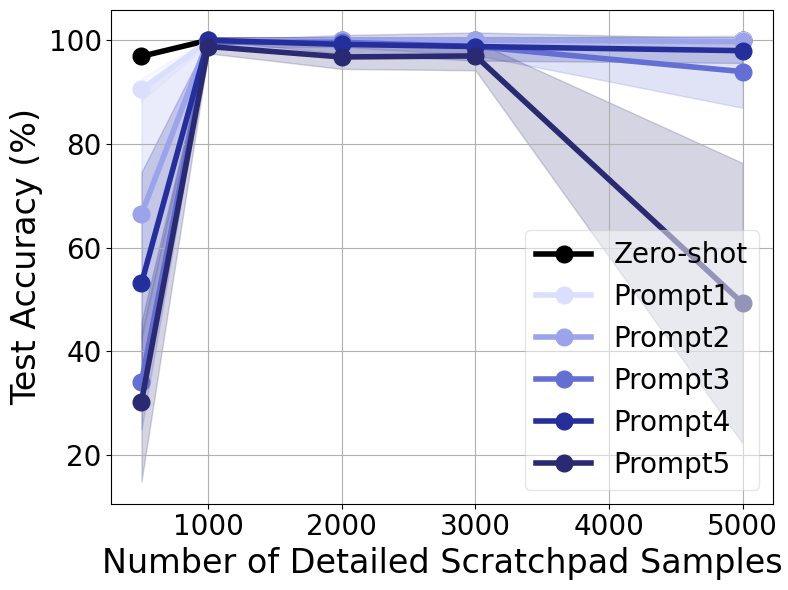

In [77]:
model='gpt2'
name='mixed_text_prompt_ar'

label = ['Prompt1', 'Prompt2', 'Prompt3', 'Prompt4', 'Prompt5']

zero_file = 'out-gpt/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_ar'].unique()
df_mean = df.groupby('num_ar').mean()
df_min = df.groupby('num_ar').min()
df_max = df.groupby('num_ar').max()

plt.figure(figsize=(8,6))
colors = wordprompt_colors

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12)
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

word_file = 'out-gpt/shakespeare_add_ar_mixed/eval_word_prompt_add10000_multiple/result.csv'
df = pd.read_csv(f'{word_file}')
for i in range(5):
    df_mean = df[df.prompt_set_num == i+1].groupby('num_ar').mean()
    df_std = df[df.prompt_set_num == i+1].groupby('num_ar').std()

    plt.plot(df_mean.index, df_mean['this_mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    plt.fill_between(df_mean.index, df_mean['this_mean_accuracy']-df_std['this_mean_accuracy'], df_mean['this_mean_accuracy']+df_std['this_mean_accuracy'], alpha=0.2, color=colors[i])

# plt.title("GPT2, Detailed Scratchpad Accuracy (with Text Prompt)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Detailed Scratchpad Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}2.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out-gpt/shakespeare_add_ar_mixed/eval_ar3000_3shot/result.csv', 'out-gpt/shakespeare_add_ar_mixed/eval_ar3000_1shot/result.csv', 'out-gpt/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv', 'out-gpt/shakespeare_add_ar_mixed/eval_word_prompt_ar3000_multiple/result.csv', 'out-gpt/shakespeare_add_ar_mixed/eval_ar3000_2shot/result.csv']
out-gpt/shakespeare_add_ar_mixed/eval_ar3000_1shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_ar3000_2shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_ar3000_3shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_word_prompt_ar3000_multiple/result.csv


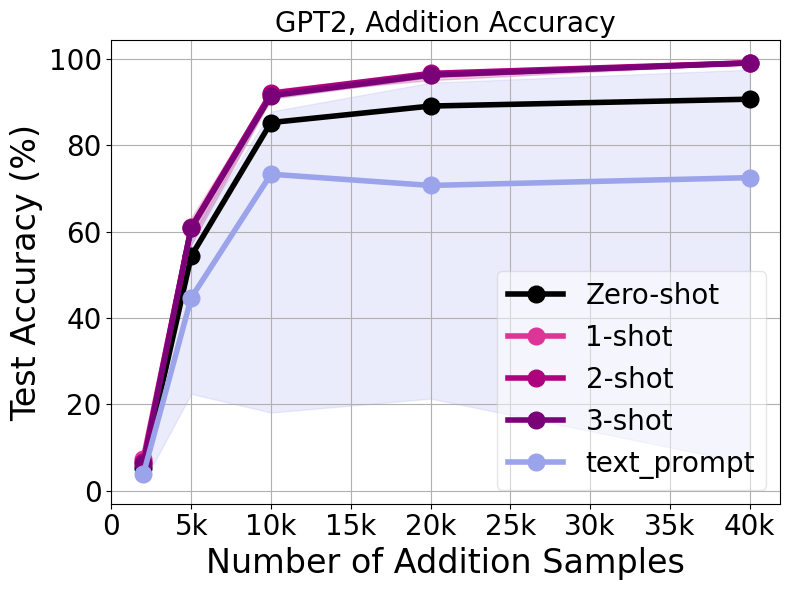

In [78]:
model='gpt2'
name='mixed_add_accuracy'

prompts = ['1shot', '2shot', '3shot','word_prompt']
label = ['1-shot', '2-shot', '3-shot', 'text_prompt']

plt.figure(figsize=(8,6))
colors = fewshot_colors

csv_list =glob.glob('out-gpt/shakespeare_add_ar_mixed/eval_*ar3000*/*.csv')
print(csv_list)

zero_file = 'out-gpt/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_add'].unique()
df_mean = df.groupby('num_add').mean()
df_min = df.groupby('num_add').min()
df_max = df.groupby('num_add').max()

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12)
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_add').mean()
    df_min = df.groupby('num_add').min()
    df_max = df.groupby('num_add').max()

    plt.plot(df_mean.index, df_mean['mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    plt.fill_between(df_mean.index, df_min['this_mean_accuracy'], df_max['this_mean_accuracy'], alpha=0.2, color=colors[i])

plt.title("GPT2, Addition Accuracy", fontsize=20)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Addition Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out-gpt/shakespeare_add_ar_mixed/eval_ar3000_3shot/result.csv', 'out-gpt/shakespeare_add_ar_mixed/eval_ar3000_1shot/result.csv', 'out-gpt/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv', 'out-gpt/shakespeare_add_ar_mixed/eval_word_prompt_ar3000_multiple/result.csv', 'out-gpt/shakespeare_add_ar_mixed/eval_ar3000_2shot/result.csv']
out-gpt/shakespeare_add_ar_mixed/eval_ar3000_1shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_ar3000_2shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_ar3000_3shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_word_prompt_ar3000_multiple/result.csv


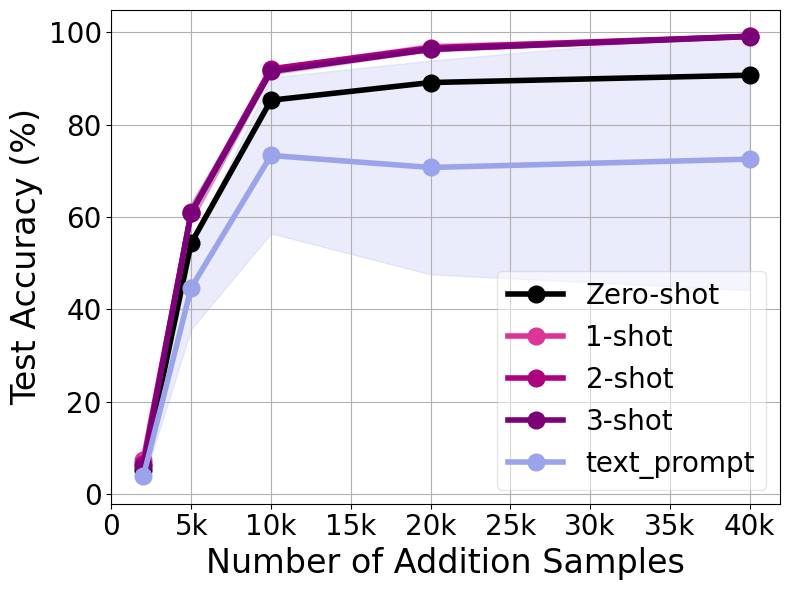

In [79]:
model='gpt2'
name='mixed_add_accuracy'

prompts = ['1shot', '2shot', '3shot','word_prompt']
label = ['1-shot', '2-shot', '3-shot', 'text_prompt']

plt.figure(figsize=(8,6))
colors = fewshot_colors

csv_list =glob.glob('out-gpt/shakespeare_add_ar_mixed/eval_*ar3000*/*.csv')
print(csv_list)

zero_file = 'out-gpt/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_add'].unique()
df_mean = df.groupby('num_add').mean()
df_min = df.groupby('num_add').min()
df_max = df.groupby('num_add').max()

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12)
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_add').mean()
    df_std = df.groupby('num_add').std()

    plt.plot(df_mean.index, df_mean['mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    plt.fill_between(df_mean.index, df_mean['mean_accuracy']-df_std['this_mean_accuracy'],np.clip((df_mean['mean_accuracy']+df_std['this_mean_accuracy']).to_numpy(),a_min=0, a_max=100), alpha=0.2, color=colors[i])

# plt.title("GPT2, Addition Accuracy", fontsize=20)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Addition Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}2.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

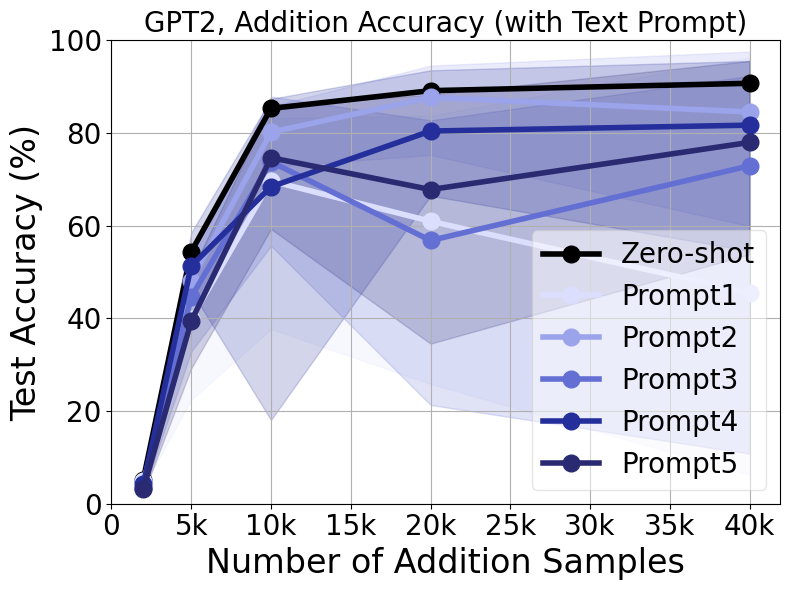

In [80]:
model='gpt2'
name='mixed_text_prompt_add'

label = ['Prompt1', 'Prompt2', 'Prompt3', 'Prompt4', 'Prompt5']

zero_file = 'out-gpt/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_add'].unique()
df_mean = df.groupby('num_add').mean()
df_min = df.groupby('num_add').min()
df_max = df.groupby('num_add').max()

plt.figure(figsize=(8,6))
colors = wordprompt_colors

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12)
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

word_file = 'out-gpt/shakespeare_add_ar_mixed/eval_word_prompt_ar3000_multiple/result.csv'
df = pd.read_csv(f'{word_file}')
for i in range(5):
    df_mean = df[df.prompt_set_num == i+1].groupby('num_add').mean()
    df_min = df[df.prompt_set_num == i+1].groupby('num_add').min()
    df_max = df[df.prompt_set_num == i+1].groupby('num_add').max()

    plt.plot(df_mean.index, df_mean['this_mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    plt.fill_between(df_mean.index, df_min['this_mean_accuracy'], df_max['this_mean_accuracy'], alpha=0.2, color=colors[i])

plt.title("GPT2, Addition Accuracy (with Text Prompt)", fontsize=20)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.ylim([0,100])
plt.yticks(fontsize=20)
plt.xlabel('Number of Addition Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

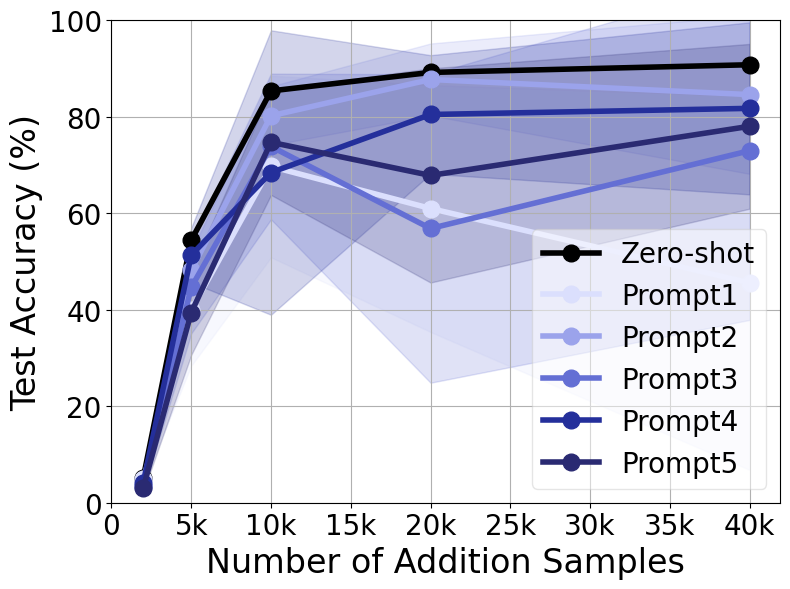

In [81]:
model='gpt2'
name='mixed_text_prompt_add'

label = ['Prompt1', 'Prompt2', 'Prompt3', 'Prompt4', 'Prompt5']

zero_file = 'out-gpt/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_add'].unique()
df_mean = df.groupby('num_add').mean()
df_min = df.groupby('num_add').min()
df_max = df.groupby('num_add').max()

plt.figure(figsize=(8,6))
colors = wordprompt_colors

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12)
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

word_file = 'out-gpt/shakespeare_add_ar_mixed/eval_word_prompt_ar3000_multiple/result.csv'
df = pd.read_csv(f'{word_file}')
for i in range(5):
    df_mean = df[df.prompt_set_num == i+1].groupby('num_add').mean()
    df_std = df[df.prompt_set_num == i+1].groupby('num_add').std()

    plt.plot(df_mean.index, df_mean['this_mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    plt.fill_between(df_mean.index, df_mean['this_mean_accuracy']-df_std['this_mean_accuracy'], df_mean['this_mean_accuracy']+df_std['this_mean_accuracy'], alpha=0.2, color=colors[i])

# plt.title("GPT2, Addition Accuracy (with Text Prompt)", fontsize=20)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.ylim([0,100])
plt.yticks(fontsize=20)
plt.xlabel('Number of Addition Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}2.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

# Comparing NanoGPT vs. GPT2

## Algorithmic Reasoning Accuracy

['out/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_word_prompt_add10000_multiple/result.csv']
out/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv
out/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv
out/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv


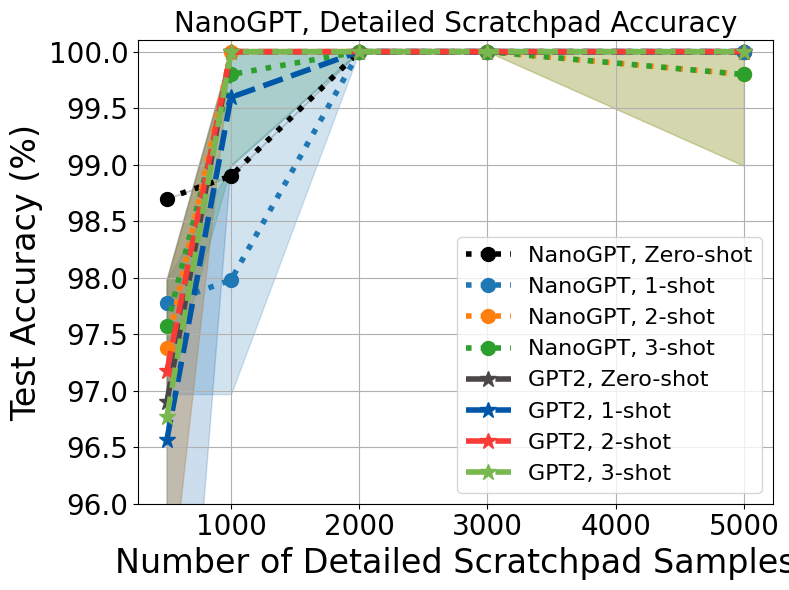

In [10]:
prompts = ['1shot', '2shot', '3shot']#,'word_prompt']
model = 'NanoGPT'
label = ['1-shot', '2-shot', '3-shot']#, 'text_prompt']
label = [f'{model}, {i}' for i in label]

plt.figure(figsize=(8,6))
colors = colors1

csv_list =glob.glob('out/shakespeare_add_ar_mixed/eval_*add10000*/*.csv')
print(csv_list)

zero_file = 'out/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_ar'].unique()
df_mean = df.groupby('num_ar').mean()
df_min = df.groupby('num_ar').min()
df_max = df.groupby('num_ar').max()

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='NanoGPT, Zero-shot', color='black', marker='o', linewidth=4, markersize=10, linestyle=':')
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_ar').mean()
    df_min = df.groupby('num_ar').min()
    df_max = df.groupby('num_ar').max()

    plt.plot(df_mean.index, df_mean['mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=10, linestyle=':')
    plt.fill_between(df_mean.index, df_min['this_mean_accuracy'], df_max['this_mean_accuracy'], alpha=0.2, color=colors[i])


model = 'GPT2'
label = ['1-shot', '2-shot', '3-shot']#, 'text_prompt']s
label = [f'{model}, {i}' for i in label]
colors = colors2

zero_file = 'out-gpt/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_ar'].unique()
df_mean = df.groupby('num_ar').mean()
df_min = df.groupby('num_ar').min()
df_max = df.groupby('num_ar').max()

csv_list =glob.glob('out-gpt/shakespeare_add_ar_mixed/eval_*add10000*/*.csv')
plt.plot(df_mean.index, df_mean['mean_accuracy'], label='GPT2, Zero-shot', color='#4a4649', marker='*', linewidth=4, markersize=12, linestyle='--')
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='#4a4649')

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_ar').mean()
    df_min = df.groupby('num_ar').min()
    df_max = df.groupby('num_ar').max()

    plt.plot(df_mean.index, df_mean['mean_accuracy'], label=label[i], color=colors[i], marker='*', linewidth=4, markersize=12, linestyle='--')
    plt.fill_between(df_mean.index, df_min['this_mean_accuracy'], df_max['this_mean_accuracy'], alpha=0.2, color=colors[i])


plt.title("NanoGPT, Detailed Scratchpad Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(96, 100.1)
plt.xlabel('Number of Detailed Scratchpad Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=16)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/comparing_nanogpt_gpt2_ar.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_word_prompt_add10000_multiple/result.csv']
out/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv
out/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv
out/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv


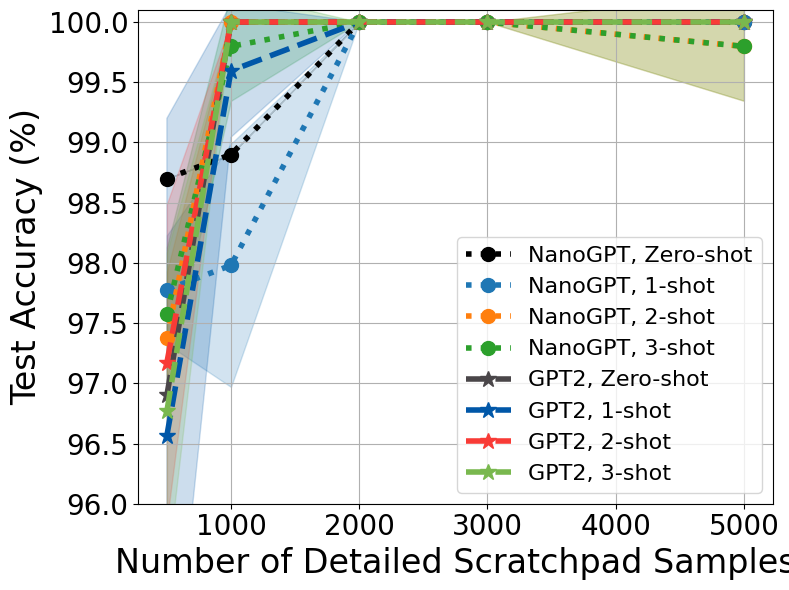

In [20]:
prompts = ['1shot', '2shot', '3shot']#,'word_prompt']
model = 'NanoGPT'
label = ['1-shot', '2-shot', '3-shot']#, 'text_prompt']
label = [f'{model}, {i}' for i in label]

plt.figure(figsize=(8,6))
colors = colors1

csv_list =glob.glob('out/shakespeare_add_ar_mixed/eval_*add10000*/*.csv')
print(csv_list)

zero_file = 'out/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_ar'].unique()
df_mean = df.groupby('num_ar').mean()
df_min = df.groupby('num_ar').min()
df_max = df.groupby('num_ar').max()

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='NanoGPT, Zero-shot', color='black', marker='o', linewidth=4, markersize=10, linestyle=':')
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_ar').mean()
    df_std = df.groupby('num_ar').std()

    plt.plot(df_mean.index, df_mean['mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=10, linestyle=':')
    plt.fill_between(df_mean.index, df_mean['mean_accuracy']-df_std['this_mean_accuracy'], df_mean['mean_accuracy']+df_std['this_mean_accuracy'], alpha=0.2, color=colors[i])


model = 'GPT2'
label = ['1-shot', '2-shot', '3-shot']#, 'text_prompt']s
label = [f'{model}, {i}' for i in label]
colors = colors2

zero_file = 'out-gpt/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_ar'].unique()
df_mean = df.groupby('num_ar').mean()
df_min = df.groupby('num_ar').min()
df_max = df.groupby('num_ar').max()

csv_list =glob.glob('out-gpt/shakespeare_add_ar_mixed/eval_*add10000*/*.csv')
plt.plot(df_mean.index, df_mean['mean_accuracy'], label='GPT2, Zero-shot', color='#4a4649', marker='*', linewidth=4, markersize=12, linestyle='--')
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='#4a4649')

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_ar').mean()
    df_std = df.groupby('num_ar').std()

    plt.plot(df_mean.index, df_mean['mean_accuracy'], label=label[i], color=colors[i], marker='*', linewidth=4, markersize=12, linestyle='--')
    plt.fill_between(df_mean.index, df_mean['mean_accuracy']-df_std['this_mean_accuracy'], df_mean['mean_accuracy']+df_std['this_mean_accuracy'], alpha=0.2, color=colors[i])


# plt.title("NanoGPT, Detailed Scratchpad Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(96, 100.1)
plt.xlabel('Number of Detailed Scratchpad Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=16)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/comparing_nanogpt_gpt2_ar2.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_word_prompt_add10000_multiple/result.csv']
out/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv
out/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv
out/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv
[[ 97.77777778  97.97979798 100.         100.         100.        ]
 [ 97.37373737 100.         100.         100.          99.7979798 ]
 [ 97.57575758  99.7979798  100.         100.          99.7979798 ]] [[ 97.77777778  97.97979798 100.         100.         100.        ]
 [ 97.37373737 100.         100.         100.          99.7979798 ]
 [ 97.57575758  99.7979798  100.         100.          99.7979798 ]] [[ 97.77777778  97.97979798 100.         100.         100.        ]
 [ 97.37

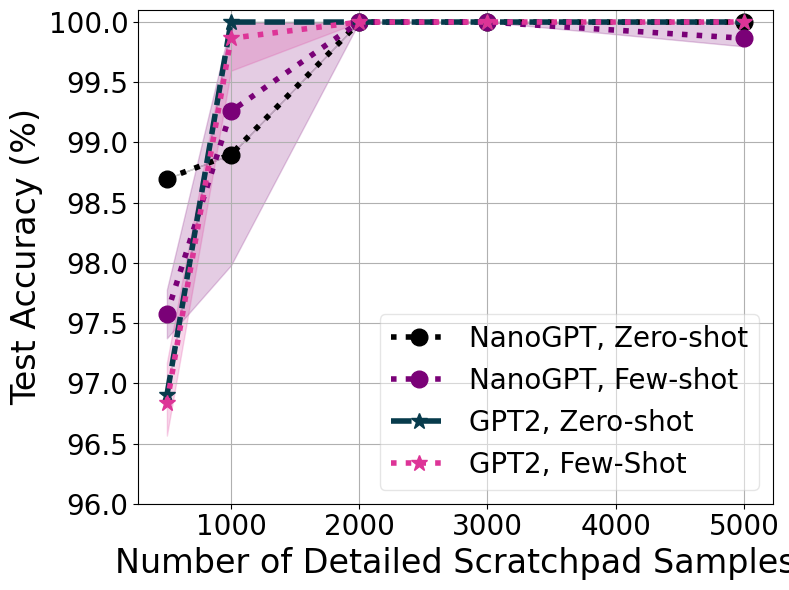

In [82]:
prompts = ['1shot', '2shot', '3shot']#,'word_prompt']
model = 'NanoGPT'
label = ['1-shot', '2-shot', '3-shot']#, 'text_prompt']
label = [f'{model}, {i}' for i in label]

plt.figure(figsize=(8,6))
colors = colors1

csv_list =glob.glob('out/shakespeare_add_ar_mixed/eval_*add10000*/*.csv')
print(csv_list)

zero_file = 'out/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_ar'].unique()
df_mean = df.groupby('num_ar').mean()
df_min = df.groupby('num_ar').min()
df_max = df.groupby('num_ar').max()

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='NanoGPT, Zero-shot', color='black', marker='o', linewidth=4, markersize=12, linestyle=':')
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

mean_list = []
min_list = []
max_list = []

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    mean_list.append(df.groupby('num_ar').mean().mean_accuracy.tolist())
    min_list.append(df.groupby('num_ar').min().mean_accuracy.tolist())
    max_list.append(df.groupby('num_ar').max().mean_accuracy.tolist())

mean_list = np.array(mean_list)
min_list = np.array(min_list)
max_list = np.array(max_list)

print(mean_list, min_list, max_list)
print(mean_list.shape, min_list.shape, max_list.shape)

plt.plot(df_mean.index, np.average(mean_list, axis=0), label='NanoGPT, Few-shot', color='#7a0177', marker='o', linewidth=4, markersize=12, linestyle=':')
plt.fill_between(df_mean.index, np.min(min_list, axis=0),np.max(max_list, axis=0), alpha=0.2, color='#7a0177')

model = 'GPT2'
label = ['1-shot', '2-shot', '3-shot']#, 'text_prompt']s
label = [f'{model}, {i}' for i in label]
colors = colors2

zero_file = 'out-gpt/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_ar'].unique()
df_mean = df.groupby('num_ar').mean()
df_min = df.groupby('num_ar').min()
df_max = df.groupby('num_ar').max()


csv_list =glob.glob('out-gpt/shakespeare_add_ar_mixed/eval_*add10000*/*.csv')
plt.plot(df_mean.index, df_mean['mean_accuracy'], label='GPT2, Zero-shot', color='#073B4C', marker='*', linewidth=4, markersize=12, linestyle='--')
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='#073B4C')

mean_list = []
min_list = []
max_list = []

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    mean_list.append(df.groupby('num_ar').mean().mean_accuracy.tolist())
    min_list.append(df.groupby('num_ar').min().mean_accuracy.tolist())
    max_list.append(df.groupby('num_ar').max().mean_accuracy.tolist())

mean_list = np.array(mean_list)
min_list = np.array(min_list)
max_list = np.array(max_list)
print(mean_list, min_list, max_list)
print(mean_list.shape, min_list.shape, max_list.shape)

plt.plot(df_mean.index, np.average(mean_list, axis=0), label='GPT2, Few-Shot', color='#dd3497', marker='*', linewidth=4, markersize=12, linestyle=':')
plt.fill_between(df_mean.index, np.min(min_list, axis=0), np.max(max_list, axis=0), alpha=0.2, color='#dd3497')

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(96, 100.1)
plt.xlabel('Number of Detailed Scratchpad Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/comparing_nanogpt_gpt2_ar.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv', 'out/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_word_prompt_add10000_multiple/result.csv']
out/shakespeare_add_ar_mixed/eval_add10000_1shot/result.csv
out/shakespeare_add_ar_mixed/eval_add10000_2shot/result.csv
out/shakespeare_add_ar_mixed/eval_add10000_3shot/result.csv
[[ 97.77777778  97.97979798 100.         100.         100.        ]
 [ 97.37373737 100.         100.         100.          99.7979798 ]
 [ 97.57575758  99.7979798  100.         100.          99.7979798 ]] [[ 97.77777778  97.97979798 100.         100.         100.        ]
 [ 97.37373737 100.         100.         100.          99.7979798 ]
 [ 97.57575758  99.7979798  100.         100.          99.7979798 ]] [[ 97.77777778  97.97979798 100.         100.         100.        ]
 [ 97.37

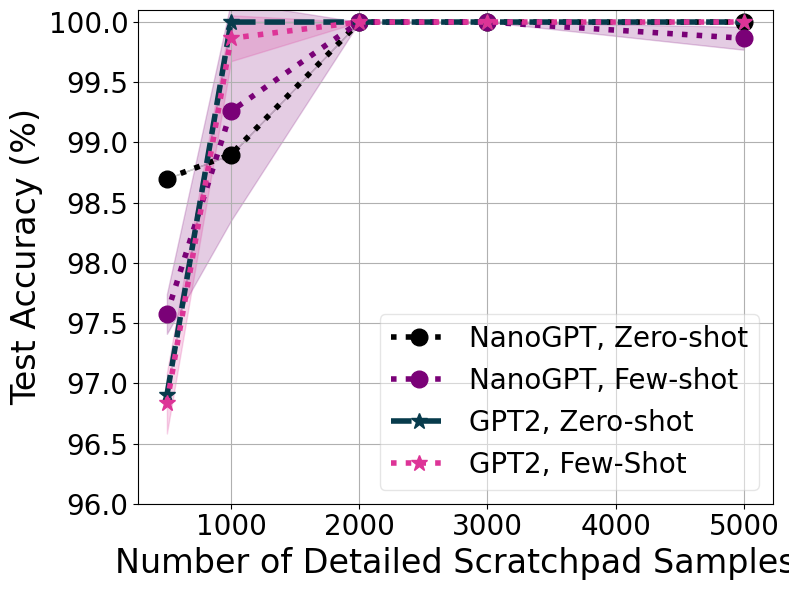

In [83]:
prompts = ['1shot', '2shot', '3shot']#,'word_prompt']
model = 'NanoGPT'
label = ['1-shot', '2-shot', '3-shot']#, 'text_prompt']
label = [f'{model}, {i}' for i in label]

plt.figure(figsize=(8,6))
colors = colors1

csv_list =glob.glob('out/shakespeare_add_ar_mixed/eval_*add10000*/*.csv')
print(csv_list)

zero_file = 'out/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_ar'].unique()
df_mean = df.groupby('num_ar').mean()
df_min = df.groupby('num_ar').min()
df_max = df.groupby('num_ar').max()

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='NanoGPT, Zero-shot', color='black', marker='o', linewidth=4, markersize=12, linestyle=':')
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

mean_list = []
min_list = []
max_list = []

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    mean_list.append(df.groupby('num_ar').mean().mean_accuracy.tolist())
    min_list.append(df.groupby('num_ar').min().mean_accuracy.tolist())
    max_list.append(df.groupby('num_ar').max().mean_accuracy.tolist())

mean_list = np.array(mean_list)
min_list = np.array(min_list)
max_list = np.array(max_list)

print(mean_list, min_list, max_list)
print(mean_list.shape, min_list.shape, max_list.shape)

plt.plot(df_mean.index, np.average(mean_list, axis=0), label='NanoGPT, Few-shot', color='#7a0177', marker='o', linewidth=4, markersize=12, linestyle=':')
plt.fill_between(df_mean.index, np.average(mean_list, axis=0)-np.std(mean_list, axis=0), np.average(mean_list, axis=0)+np.std(mean_list, axis=0), alpha=0.2, color='#7a0177')

model = 'GPT2'
label = ['1-shot', '2-shot', '3-shot']#, 'text_prompt']s
label = [f'{model}, {i}' for i in label]
colors = colors2

zero_file = 'out-gpt/shakespeare_add_ar_mixed/eval_add10000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_ar'].unique()
df_mean = df.groupby('num_ar').mean()
df_min = df.groupby('num_ar').min()
df_max = df.groupby('num_ar').max()


csv_list =glob.glob('out-gpt/shakespeare_add_ar_mixed/eval_*add10000*/*.csv')
plt.plot(df_mean.index, df_mean['mean_accuracy'], label='GPT2, Zero-shot', color='#073B4C', marker='*', linewidth=4, markersize=12, linestyle='--')
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='#073B4C')

mean_list = []
min_list = []
max_list = []

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    mean_list.append(df.groupby('num_ar').mean().mean_accuracy.tolist())
    min_list.append(df.groupby('num_ar').min().mean_accuracy.tolist())
    max_list.append(df.groupby('num_ar').max().mean_accuracy.tolist())

mean_list = np.array(mean_list)
min_list = np.array(min_list)
max_list = np.array(max_list)
print(mean_list, min_list, max_list)
print(mean_list.shape, min_list.shape, max_list.shape)

plt.plot(df_mean.index, np.average(mean_list, axis=0), label='GPT2, Few-Shot', color='#dd3497', marker='*', linewidth=4, markersize=12, linestyle=':')
plt.fill_between(df_mean.index, np.average(mean_list, axis=0)-np.std(mean_list, axis=0), np.average(mean_list, axis=0)+np.std(mean_list, axis=0), alpha=0.2, color='#dd3497')

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(96, 100.1)
plt.xlabel('Number of Detailed Scratchpad Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/comparing_nanogpt_gpt2_ar2.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

## Addition Accuracy

['out/shakespeare_add_ar_mixed/eval_ar3000_3shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_ar3000_1shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv', 'out/shakespeare_add_ar_mixed/eval_word_prompt_ar3000_multiple/result.csv', 'out/shakespeare_add_ar_mixed/eval_ar3000_2shot/result.csv']
out/shakespeare_add_ar_mixed/eval_ar3000_1shot/result.csv
out/shakespeare_add_ar_mixed/eval_ar3000_2shot/result.csv
out/shakespeare_add_ar_mixed/eval_ar3000_3shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_ar3000_1shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_ar3000_2shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_ar3000_3shot/result.csv


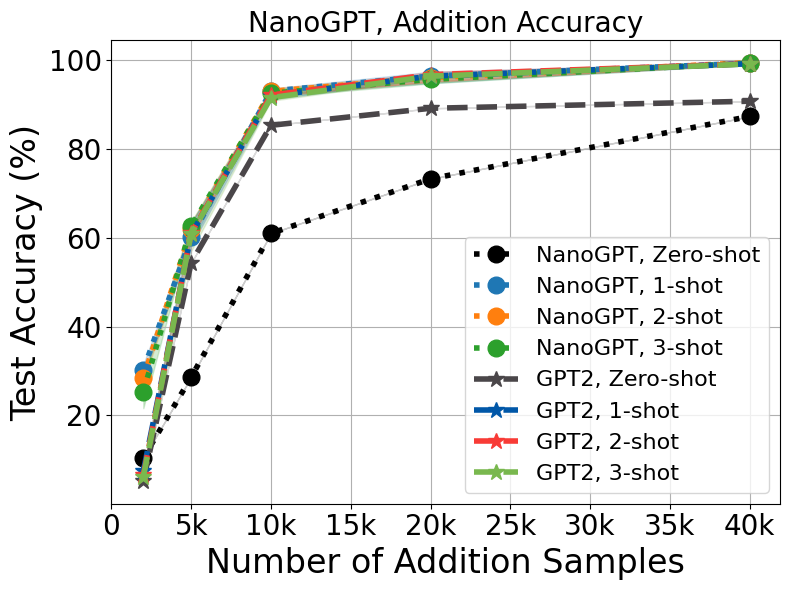

In [32]:
prompts = ['1shot', '2shot', '3shot']#,'word_prompt']
model = 'NanoGPT'
label = ['1-shot', '2-shot', '3-shot']#, 'text_prompt']
label = [f'{model}, {i}' for i in label]

plt.figure(figsize=(8,6))
colors = colors1

csv_list =glob.glob('out/shakespeare_add_ar_mixed/eval_*ar3000*/*.csv')
print(csv_list)

zero_file = 'out/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_add'].unique()
df_mean = df.groupby('num_add').mean()
df_min = df.groupby('num_add').min()
df_max = df.groupby('num_add').max()

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='NanoGPT, Zero-shot', color='black', marker='o', linewidth=4, markersize=12, linestyle=':')
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_add').mean()
    df_min = df.groupby('num_add').min()
    df_max = df.groupby('num_add').max()

    plt.plot(df_mean.index, df_mean['mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12, linestyle=':')
    plt.fill_between(df_mean.index, df_min['this_mean_accuracy'], df_max['this_mean_accuracy'], alpha=0.2, color=colors[i])

model = 'GPT2'
label = ['1-shot', '2-shot', '3-shot']#, 'text_prompt']s
label = [f'{model}, {i}' for i in label]
colors = colors2

zero_file = 'out-gpt/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_add'].unique()
df_mean = df.groupby('num_add').mean()
df_min = df.groupby('num_add').min()
df_max = df.groupby('num_add').max()

csv_list =glob.glob('out-gpt/shakespeare_add_ar_mixed/eval_*ar3000*/*.csv')
plt.plot(df_mean.index, df_mean['mean_accuracy'], label='GPT2, Zero-shot', color='#4a4649', marker='*', linewidth=4, markersize=12, linestyle='--')
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='#4a4649')

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_add').mean()
    df_min = df.groupby('num_add').min()
    df_max = df.groupby('num_add').max()

    plt.plot(df_mean.index, df_mean['mean_accuracy'], label=label[i], color=colors[i], marker='*', linewidth=4, markersize=12, linestyle='--')
    plt.fill_between(df_mean.index, df_min['this_mean_accuracy'], df_max['this_mean_accuracy'], alpha=0.2, color=colors[i])



plt.title("NanoGPT, Addition Accuracy", fontsize=20)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(0, 100.5)
plt.xlabel('Number of Addition Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=16)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/comparing_nanogpt_gpt2_add.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out/shakespeare_add_ar_mixed/eval_ar3000_3shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_ar3000_1shot/result.csv', 'out/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv', 'out/shakespeare_add_ar_mixed/eval_word_prompt_ar3000_multiple/result.csv', 'out/shakespeare_add_ar_mixed/eval_ar3000_2shot/result.csv']
out/shakespeare_add_ar_mixed/eval_ar3000_1shot/result.csv
out/shakespeare_add_ar_mixed/eval_ar3000_2shot/result.csv
out/shakespeare_add_ar_mixed/eval_ar3000_3shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_ar3000_1shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_ar3000_2shot/result.csv
out-gpt/shakespeare_add_ar_mixed/eval_ar3000_3shot/result.csv


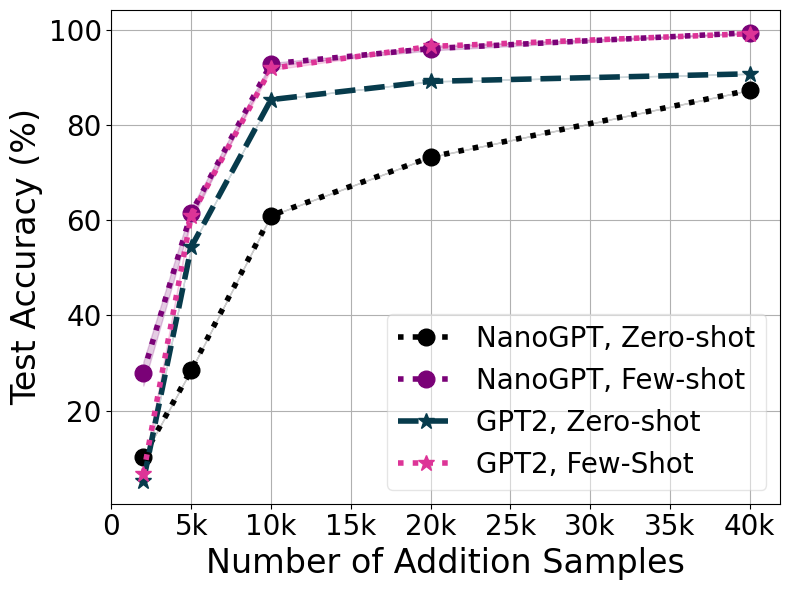

In [84]:
prompts = ['1shot', '2shot', '3shot']#,'word_prompt']
model = 'NanoGPT'
label = ['1-shot', '2-shot', '3-shot']#, 'text_prompt']
label = [f'{model}, {i}' for i in label]

plt.figure(figsize=(8,6))
colors = colors1

csv_list =glob.glob('out/shakespeare_add_ar_mixed/eval_*ar3000*/*.csv')
print(csv_list)

zero_file = 'out/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_add'].unique()
df_mean = df.groupby('num_add').mean()
df_min = df.groupby('num_add').min()
df_max = df.groupby('num_add').max()

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='NanoGPT, Zero-shot', color='black', marker='o', linewidth=4, markersize=12, linestyle=':')
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

mean_list = []
min_list = []
max_list = []

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    mean_list.append(df.groupby('num_add').mean().mean_accuracy.tolist())
    min_list.append(df.groupby('num_add').min().mean_accuracy.tolist())
    max_list.append(df.groupby('num_add').max().mean_accuracy.tolist())

mean_list = np.array(mean_list)
min_list = np.array(min_list)
max_list = np.array(max_list)

plt.plot(df_mean.index, np.average(mean_list, axis=0), label='NanoGPT, Few-shot', color='#7a0177', marker='o', linewidth=4, markersize=12, linestyle=':')
plt.fill_between(df_mean.index, np.min(min_list, axis=0),np.max(max_list, axis=0), alpha=0.2, color='#7a0177')

model = 'GPT2'
label = ['1-shot', '2-shot', '3-shot']#, 'text_prompt']s
label = [f'{model}, {i}' for i in label]
colors = colors2

zero_file = 'out-gpt/shakespeare_add_ar_mixed/eval_ar3000_zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_add'].unique()
df_mean = df.groupby('num_add').mean()
df_min = df.groupby('num_add').min()
df_max = df.groupby('num_add').max()

csv_list =glob.glob('out-gpt/shakespeare_add_ar_mixed/eval_*ar3000*/*.csv')
plt.plot(df_mean.index, df_mean['mean_accuracy'], label='GPT2, Zero-shot', color='#073B4C', marker='*', linewidth=4, markersize=12, linestyle='--')
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='#073B4C')

mean_list = []
min_list = []
max_list = []

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    mean_list.append(df.groupby('num_add').mean().mean_accuracy.tolist())
    min_list.append(df.groupby('num_add').min().mean_accuracy.tolist())
    max_list.append(df.groupby('num_add').max().mean_accuracy.tolist())

mean_list = np.array(mean_list)
min_list = np.array(min_list)
max_list = np.array(max_list)

plt.plot(df_mean.index, np.average(mean_list, axis=0), label='GPT2, Few-Shot', color='#dd3497', marker='*', linewidth=4, markersize=12, linestyle=':')
plt.fill_between(df_mean.index, np.min(min_list, axis=0),np.max(max_list, axis=0), alpha=0.2, color='#dd3497')

# plt.title("NanoGPT, Addition Accuracy", fontsize=20)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(0, 100.5)
plt.xlabel('Number of Addition Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/comparing_nanogpt_gpt2_add.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

# NanoGPT,trained only on addition

## Large Vocab

In [15]:
csv_list =glob.glob('out/out-addition-large-vocab/tmp/*/*.csv')
print(csv_list)

['out/out-addition-large-vocab/tmp/add_2shot/result.csv', 'out/out-addition-large-vocab/tmp/add-bal_samplenum/result.csv', 'out/out-addition-large-vocab/tmp/add_3shot/result.csv', 'out/out-addition-large-vocab/tmp/add_noisyprompt/result.csv', 'out/out-addition-large-vocab/tmp/eval_word_prompt_multiple/result.csv', 'out/out-addition-large-vocab/tmp/add_1shot/result.csv']


In [16]:
df = pd.read_csv('out/out-addition-large-vocab/tmp/add_2shot/result.csv')
keys = df.keys()
df.head()

prompt_set_num  prompt_num  num_train_samples  test_accuracy  num_ar  \
0             1.0         1.0                NaN            NaN     NaN   
1             2.0         1.0                NaN            NaN     NaN   
2             3.0         1.0                NaN            NaN     NaN   
3             4.0         1.0                NaN            NaN     NaN   
4             5.0         1.0                NaN            NaN     NaN   

   num_add  mean_accuracy  this_mean_accuracy  at_least_one_correct  
0      500            NaN            0.131313                   NaN  
1      500            NaN            0.121212                   NaN  
2      500            NaN            0.101010                   NaN  
3      500            NaN            0.070707                   NaN  
4      500            NaN            0.121212                   NaN

In [17]:
zero_file = 'out/out-addition-large-vocab/zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_ar = df['num_train_samples'].unique()
df_mean = df.groupby('num_train_samples').mean()
df_min = df.groupby('num_train_samples').min()
df_max = df.groupby('num_train_samples').max()

df_mean.head()

test_accuracy  num_ar  num_add  mean_accuracy  \
num_train_samples                                                  
500                         0.15     NaN      NaN           0.15   
1000                        0.13     NaN      NaN           0.13   
2000                        2.58     NaN      NaN           2.58   
5000                       63.83     NaN      NaN          63.83   
10000                      87.86     NaN      NaN          87.86   

                   this_accuracy  at_least_one_correct  
num_train_samples                                       
500                         0.15                  0.15  
1000                        0.13                  0.13  
2000                        2.58                  2.58  
5000                       63.83                 63.83  
10000                      87.86                 87.86

['out/out-addition-large-vocab/zeroshot/result.csv', 'out/out-addition-large-vocab/add_2shot/result.csv', 'out/out-addition-large-vocab/add_3shot/result.csv', 'out/out-addition-large-vocab/add_noisyprompt/result.csv', 'out/out-addition-large-vocab/addition_10000/result.csv', 'out/out-addition-large-vocab/eval_word_prompt_multiple/result.csv', 'out/out-addition-large-vocab/add_1shot/result.csv']
out/out-addition-large-vocab/add_1shot/result.csv
out/out-addition-large-vocab/add_2shot/result.csv
out/out-addition-large-vocab/add_3shot/result.csv
out/out-addition-large-vocab/add_3shot/result.csv
out/out-addition-large-vocab/eval_word_prompt_multiple/result.csv


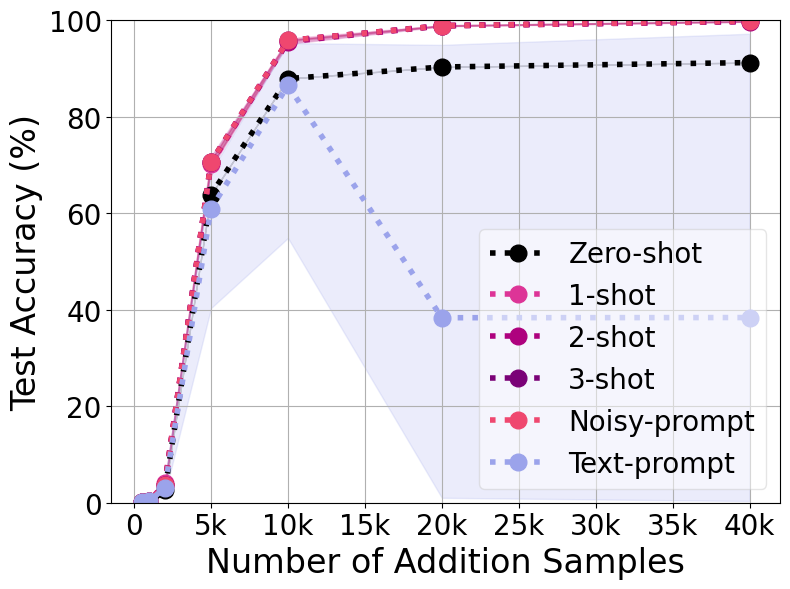

In [85]:
model='nanogpt'
name='only_addition_large_vocab'

prompts = ['1shot', '2shot', '3shot', 'noisy_prompt', 'word_prompt']
label = ['1-shot', '2-shot', '3-shot', 'Noisy-prompt', 'Text-prompt']
model = 'NanoGPT'

csv_list =glob.glob('out/out-addition-large-vocab/*/*.csv')
print(csv_list)

plt.figure(figsize=(8,6))
colors = fewshot_with_noise_colors

zero_file = 'out/out-addition-large-vocab/zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_samples = df['num_train_samples'].unique()
df_mean = df.groupby('num_train_samples').mean()
df_min = df.groupby('num_train_samples').min()
df_max = df.groupby('num_train_samples').max()

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12, linestyle=':')
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_add').mean()
    df_min = df.groupby('num_add').min()
    df_max = df.groupby('num_add').max()

    plt.plot(df_mean.index, df_mean['mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12, linestyle=':')
    plt.fill_between(df_mean.index, df_min['this_mean_accuracy'], df_max['this_mean_accuracy'], alpha=0.2, color=colors[i])


# plt.title("NanoGPT, Addition Accuracy (trained only on addition)", fontsize=20)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.ylim([0,100])
plt.yticks(fontsize=20)
plt.xlabel('Number of Addition Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out/out-addition-large-vocab/zeroshot/result.csv', 'out/out-addition-large-vocab/add_2shot/result.csv', 'out/out-addition-large-vocab/add_3shot/result.csv', 'out/out-addition-large-vocab/add_noisyprompt/result.csv', 'out/out-addition-large-vocab/addition_10000/result.csv', 'out/out-addition-large-vocab/eval_word_prompt_multiple/result.csv', 'out/out-addition-large-vocab/add_1shot/result.csv']
out/out-addition-large-vocab/add_1shot/result.csv
out/out-addition-large-vocab/add_2shot/result.csv
out/out-addition-large-vocab/add_3shot/result.csv
out/out-addition-large-vocab/add_3shot/result.csv
out/out-addition-large-vocab/eval_word_prompt_multiple/result.csv


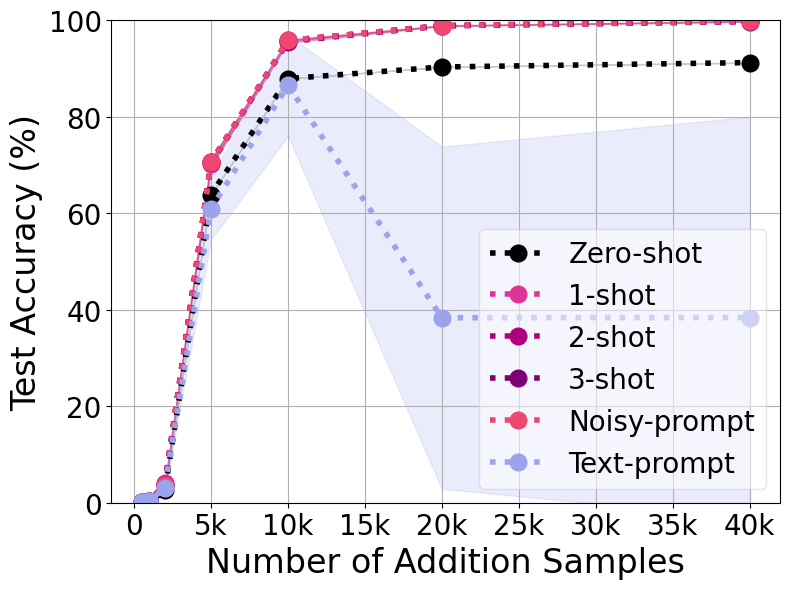

In [86]:
model='nanogpt'
name='only_addition_large_vocab'

prompts = ['1shot', '2shot', '3shot', 'noisy_prompt', 'word_prompt']
label = ['1-shot', '2-shot', '3-shot', 'Noisy-prompt', 'Text-prompt']
model = 'NanoGPT'

csv_list =glob.glob('out/out-addition-large-vocab/*/*.csv')
print(csv_list)

plt.figure(figsize=(8,6))
colors = fewshot_with_noise_colors

zero_file = 'out/out-addition-large-vocab/zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_samples = df['num_train_samples'].unique()
df_mean = df.groupby('num_train_samples').mean()
df_min = df.groupby('num_train_samples').min()
df_max = df.groupby('num_train_samples').max()

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12, linestyle=':')
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_add').mean()
    df_std = df.groupby('num_add').std()

    plt.plot(df_mean.index, df_mean['mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12, linestyle=':')
    plt.fill_between(df_mean.index, df_mean['mean_accuracy']-df_std['this_mean_accuracy'], df_mean['mean_accuracy']+df_std['this_mean_accuracy'], alpha=0.2, color=colors[i])


# plt.title("NanoGPT, Addition Accuracy (trained only on addition)", fontsize=20)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.ylim([0,100])
plt.yticks(fontsize=20)
plt.xlabel('Number of Addition Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}2.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out/out-addition-bal/eval_add_noisyprompt/result.csv', 'out/out-addition-bal/eval_addition_bal/result.csv', 'out/out-addition-bal/eval_addition_bal/result_carry.csv', 'out/out-addition-bal/eval_add_1shot/result.csv', 'out/out-addition-bal/eval_add_3shot/result.csv', 'out/out-addition-bal/eval_add-bal_Zeroshot/result.csv', 'out/out-addition-bal/eval_add_2shot/result.csv']
out/out-addition-bal/eval_add_1shot/result.csv
out/out-addition-bal/eval_add_2shot/result.csv
out/out-addition-bal/eval_add_3shot/result.csv
out/out-addition-bal/eval_add_3shot/result.csv


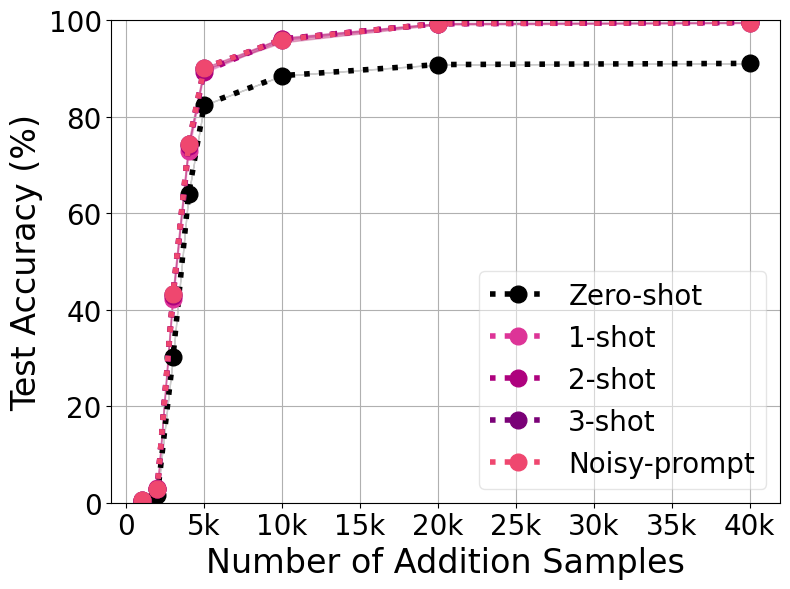

In [3]:
model='nanogpt'
name='only_addition'

prompts = ['1shot', '2shot', '3shot', 'noisy_prompt']
label = ['1-shot', '2-shot', '3-shot', 'Noisy-prompt']
model = 'NanoGPT'

csv_list =glob.glob('out/out-addition-bal/*/*.csv')
print(csv_list)

plt.figure(figsize=(8,6))
colors = fewshot_with_noise_colors

zero_file = 'out/out-addition-bal/eval_add-bal_Zeroshot/result.csv'
df = pd.read_csv(f'{zero_file}')
keys = df.keys()
num_samples = df['num_train_samples'].unique()
df_mean = df.groupby('num_train_samples').mean()
df_min = df.groupby('num_train_samples').min()
df_max = df.groupby('num_train_samples').max()

plt.plot(df_mean.index, df_mean['mean_accuracy'], label='Zero-shot', color='black', marker='o', linewidth=4, markersize=12, linestyle=':')
plt.fill_between(df_mean.index, df_min['this_accuracy'], df_max['this_accuracy'], alpha=0.2, color='black')

for i, prompt in enumerate(prompts):
    for csv_file in csv_list:
        if prompt in csv_file:
            file = csv_file
            break
    print(file)
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_add').mean()
    df_min = df.groupby('num_add').min()
    df_max = df.groupby('num_add').max()

    plt.plot(df_mean.index, df_mean['mean_accuracy'], label=label[i], color=colors[i], marker='o', linewidth=4, markersize=12, linestyle=':')
    plt.fill_between(df_mean.index, df_min['this_mean_accuracy'], df_max['this_mean_accuracy'], alpha=0.2, color=colors[i])


# plt.title("NanoGPT, Addition Accuracy (trained only on addition)", fontsize=20)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.ylim([0,100])
plt.yticks(fontsize=20)
plt.xlabel('Number of Addition Samples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

# Evaluating Multiplication / Subtraction

In [4]:
files = glob.glob('out2/subtraction_*/eval*/*.csv')
print(files)

['out2/subtraction_reverse/eval_reverse_Zeroshot/result.csv', 'out2/subtraction_ar/eval_ar_Zeroshot/result.csv', 'out2/subtraction_plain/eval_plain_Zeroshot/result.csv']


['out2/subtraction_ar_simple/eval_ar_simple_Zeroshot/result.csv', 'out2/subtraction_reverse/eval_reverse_Zeroshot/result.csv', 'out2/subtraction_ar/eval_ar_Zeroshot/result.csv', 'out2/subtraction_plain/eval_plain_Zeroshot/result.csv']
out2/subtraction_plain/eval_plain_Zeroshot/result.csv
out2/subtraction_reverse/eval_reverse_Zeroshot/result.csv
out2/subtraction_ar_simple/eval_ar_simple_Zeroshot/result.csv
out2/subtraction_ar/eval_ar_Zeroshot/result.csv


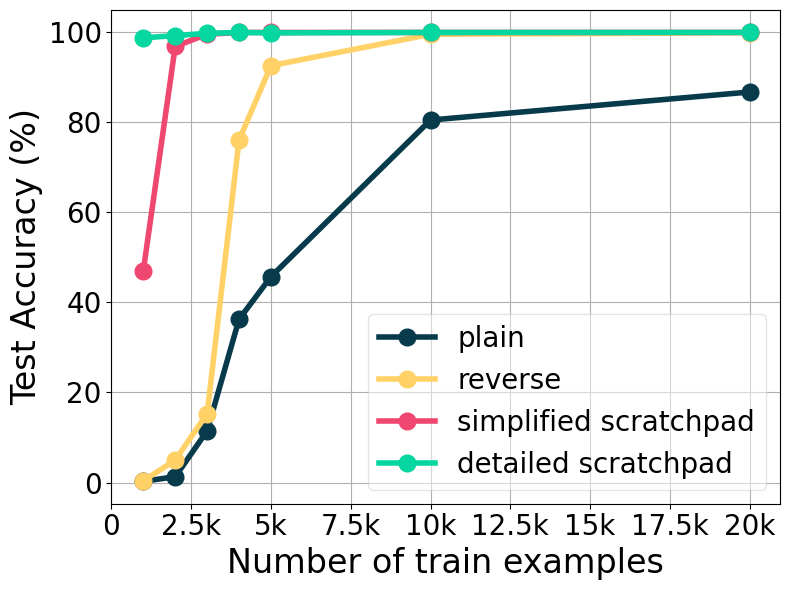

In [88]:
model='nanogpt'
name='subtraction_sample_efficiency'

methods = ['plain', 'reverse', 'ar_simple', 'ar']
labels = ['plain', 'reverse', 'simplified scratchpad', 'detailed scratchpad']

plt.figure(figsize=(8,6))
colors = colors1

files = glob.glob('out2/subtraction_*/eval*/*.csv')
print(files)
for i, method in enumerate(methods):
    file = ''
    for file_check in files:
        if method in file_check:
            file = file_check
            files.remove(file_check)
            break
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    df.sort_values(by=['num_train_samples'], inplace=True)
    # num_ar = df['num_train_samples'].unique()

    # df_mean = df.groupby('num_train_samples').mean()
    # df_min = df.groupby('num_train_samples').min()
    # df_max = df.groupby('num_train_samples').max()

    plt.plot(df.num_train_samples, df.test_accuracy, label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(700, 7000)
# plt.ylim(0, 100)
plt.xticks([0,2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000], 
           ["0", "2.5k", "5k", "7.5k","10k", "12.5k", "15k", "17.5k", "20k" ], fontsize=20)

plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out2/subtraction_ar_simple/eval_ar_simple_Zeroshot/result.csv', 'out2/subtraction_reverse/eval_reverse_Zeroshot/result.csv', 'out2/subtraction_ar/eval_ar_Zeroshot/result.csv', 'out2/subtraction_plain/eval_plain_Zeroshot/result.csv']
out2/subtraction_plain/eval_plain_Zeroshot/result.csv
out2/subtraction_reverse/eval_reverse_Zeroshot/result.csv
out2/subtraction_ar_simple/eval_ar_simple_Zeroshot/result.csv


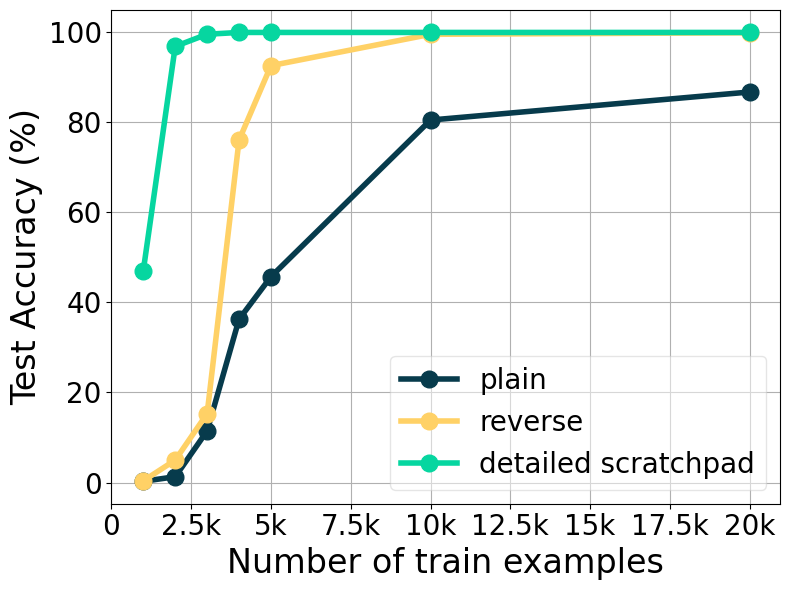

In [89]:
model='nanogpt'
name='subtraction_sample_efficiency'

methods = ['plain', 'reverse', 'ar']
labels = ['plain', 'reverse', 'detailed scratchpad']

plt.figure(figsize=(8,6))
colors = [colors1[i] for i in [0,1,3]]

files = glob.glob('out2/subtraction_*/eval*/*.csv')
print(files)
for i, method in enumerate(methods):
    file = ''
    for file_check in files:
        if method in file_check:
            file = file_check
            break
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    df.sort_values(by=['num_train_samples'], inplace=True)
    # num_ar = df['num_train_samples'].unique()

    # df_mean = df.groupby('num_train_samples').mean()
    # df_min = df.groupby('num_train_samples').min()
    # df_max = df.groupby('num_train_samples').max()

    plt.plot(df.num_train_samples, df.test_accuracy, label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(700, 7000)
# plt.ylim(0, 100)
plt.xticks([0,2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000], 
           ["0", "2.5k", "5k", "7.5k","10k", "12.5k", "15k", "17.5k", "20k" ], fontsize=20)

plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out2/multiplication_reverse/eval_reverse_Zeroshot/result.csv', 'out2/multiplication_ar/eval_ar_Zeroshot/result.csv', 'out2/multiplication_plain/eval_plain_Zeroshot/result.csv']
out2/multiplication_plain/eval_plain_Zeroshot/result.csv
out2/multiplication_reverse/eval_reverse_Zeroshot/result.csv
out2/multiplication_ar/eval_ar_Zeroshot/result.csv


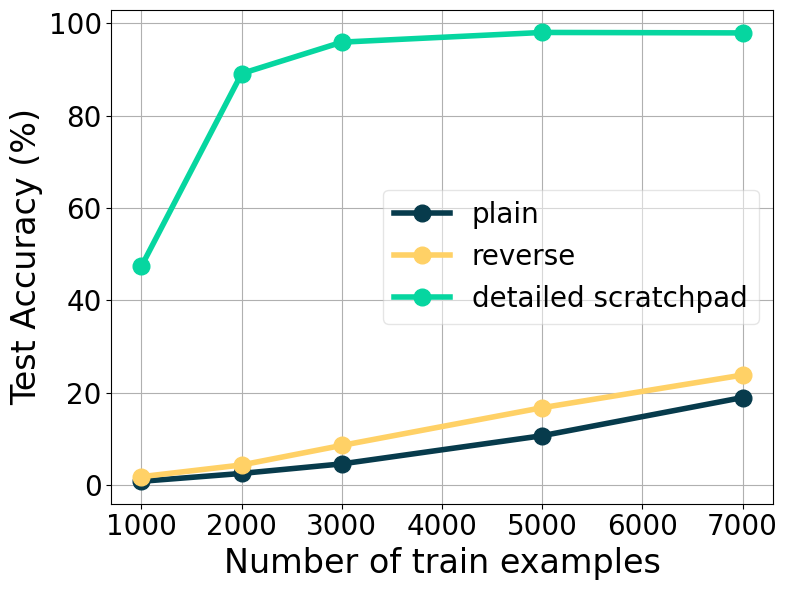

In [90]:
model='nanogpt'
name='multiplication_sample_efficiency'

methods = ['plain', 'reverse', 'ar']
labels = ['plain', 'reverse', 'detailed scratchpad']

plt.figure(figsize=(8,6))
colors = [colors1[i] for i in [0,1,3]]

files = glob.glob('out2/multiplication_*/eval*/*.csv')
print(files)
for i, method in enumerate(methods):
    file = ''
    for file_check in files:
        if method in file_check:
            file = file_check
            break
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    df.sort_values(by=['num_train_samples'], inplace=True)
    # num_ar = df['num_train_samples'].unique()

    # df_mean = df.groupby('num_train_samples').mean()
    # df_min = df.groupby('num_train_samples').min()
    # df_max = df.groupby('num_train_samples').max()

    plt.plot(df.num_train_samples, df.test_accuracy, label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(700, 7000)
# plt.ylim(0, 100)

plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='center right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

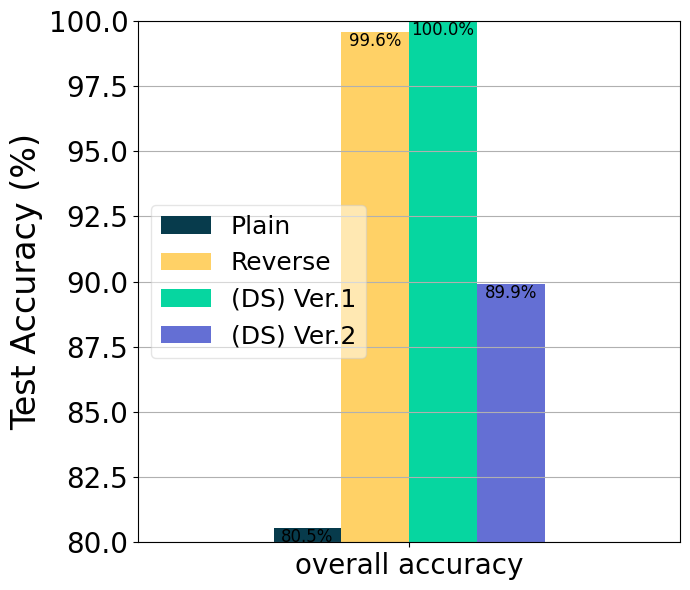

In [7]:
import pandas as pd

# colors=[colors1[i] for i in [0,1,3,4]]
colors3 = ['#073B4C', '#FFD166','#06D6A0','#646FD4']

plotdata = pd.DataFrame({

    "overall accuracy":[80.53535353535354, 99.58585858585859, 100, 89.9]
    # "Plain":[80.53535353535354],

    # "Reverse":[99.58585858585859],

    # "AR_ver1":[100],
    
    # "AR_ver2":[89.9]
    },

    # index=["Overall Accuracy",]
    # index=["Plain","Reverse","AR_ver1","AR_ver2"]
    index=["Plain","Reverse","(DS) Ver.1","(DS) Ver.2"]

)

ax = plotdata.T.plot(kind="bar",figsize=(7, 6), color=colors3)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=12, label_type='edge', padding=-13)

plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)

# plt.title("Addition accuracy with different data sampling", fontsize=20)
plt.ylim(80, 100)
# plt.xlabel('Addition Accuracy',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='center left', fontsize=18, framealpha=0.5)
plt.grid(axis=  'y')
plt.tight_layout()

plt.savefig(f'figs/subtraction_different_methods.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

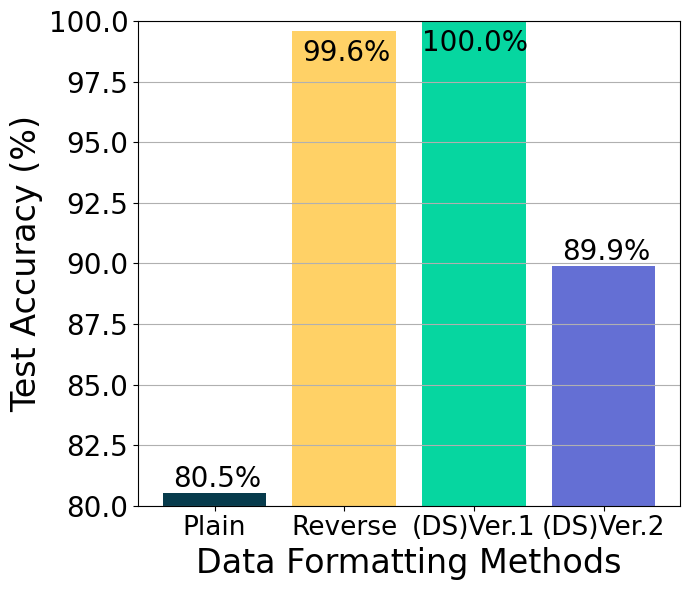

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

colors3 = ['#073B4C', '#FFD166','#06D6A0','#646FD4']

plotdata = pd.DataFrame({
    "overall accuracy":[80.53535353535354, 99.58585858585859, 100, 89.9]
    },
    index=["Plain","Reverse","(DS)Ver.1","(DS)Ver.2"]
)

fig,ax = plt.subplots(figsize=(7, 6))
bars = ax.bar(plotdata.index, plotdata['overall accuracy'], color=colors3)

ax.set_xlabel('Data Formatting Methods',fontsize=24)
ax.set_ylabel('Test Accuracy (%)',fontsize=24)
ax.set_ylim(80, 100)
ax.tick_params(axis="x", rotation=0, labelsize=19)
ax.tick_params(axis="y", labelsize=20)

for i, bar in enumerate(bars):
    yval = bar.get_height()
    if i==2:
        plt.text(bar.get_x(), yval-1.5,  '{:.1f}%'.format(yval), va='bottom', fontsize=20) #adjust fontsize here
    else:
        if i==1:
            plt.text(bar.get_x() + bar.get_width()/10.0, yval-1.5,  '{:.1f}%'.format(yval), va='bottom', fontsize=20) #adjust fontsize here
        else:
            plt.text(bar.get_x() + bar.get_width()/10.0, yval,  '{:.1f}%'.format(yval),  va='bottom', fontsize=20) #adjust fontsize here

plt.grid(axis='y')
plt.tight_layout()
plt.savefig(f'figs/subtraction_different_methods.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out2/sin_ar_v2/eval_sin_ar_v2_Zeroshot/result.csv', 'out2/sin/eval_sin_plain_Zeroshot/result.csv', 'out2/sin_ar/eval_sin_ar_Zeroshot/result.csv']
out2/sin/eval_sin_plain_Zeroshot/result.csv
out2/sin_ar_v2/eval_sin_ar_v2_Zeroshot/result.csv


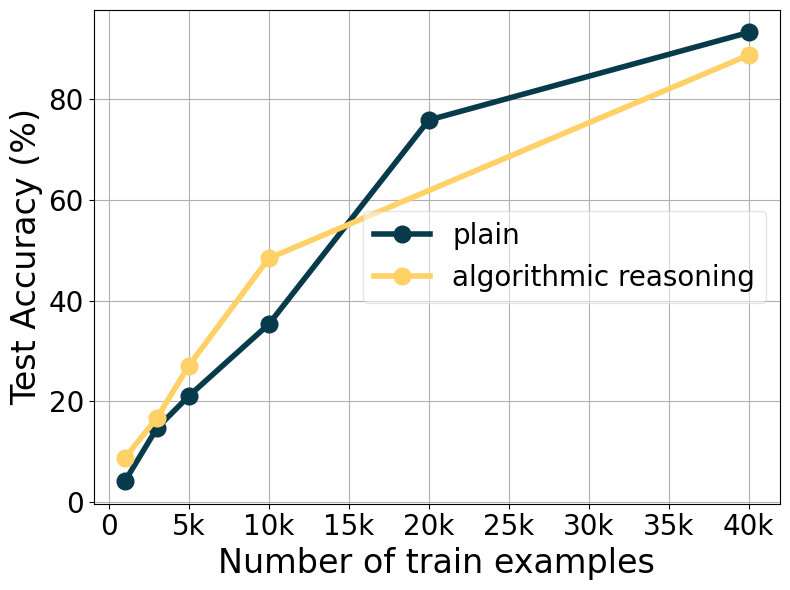

In [92]:
model='nanogpt'
name='sin_sample_efficiency'

methods = ['plain', 'ar']
labels = ['plain', 'algorithmic reasoning']

plt.figure(figsize=(8,6))
colors = [colors1[i] for i in [0,1,3]]

files = glob.glob('out2/sin*/eval*Zeroshot/*.csv')
print(files)
for i, method in enumerate(methods):
    file = ''
    for file_check in files:
        if method in file_check:
            file = file_check
            break
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    df.sort_values(by=['num_train_samples'], inplace=True)
    # num_ar = df['num_train_samples'].unique()

    # df_mean = df.groupby('num_train_samples').mean()
    # df_min = df.groupby('num_train_samples').min()
    # df_max = df.groupby('num_train_samples').max()

    plt.plot(df.num_train_samples, df.test_accuracy, label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(700, 7000)
# plt.ylim(0, 100)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='center right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out2/sqrt/eval_sqrt_plain_Zeroshot/result.csv', 'out2/sqrt_ar/eval_sqrt_ar_Zeroshot/result.csv']
out2/sqrt/eval_sqrt_plain_Zeroshot/result.csv
out2/sqrt_ar/eval_sqrt_ar_Zeroshot/result.csv


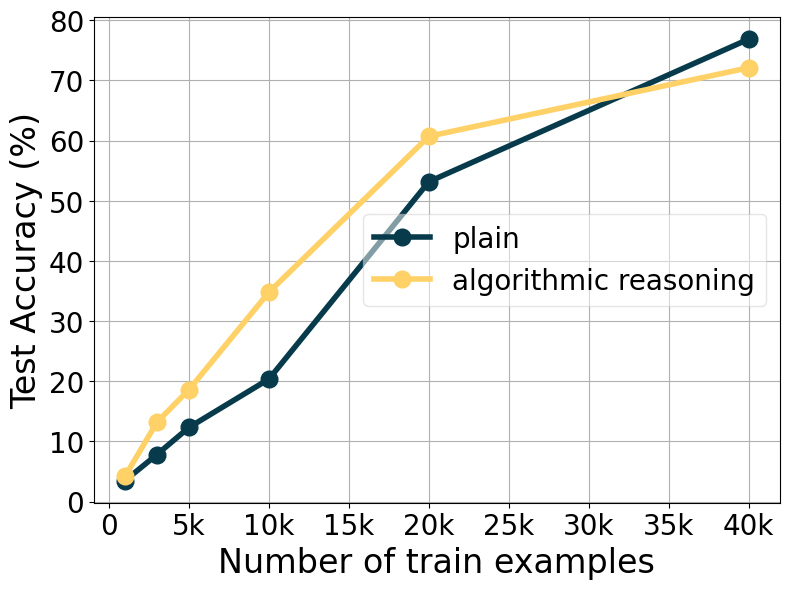

In [93]:
model='nanogpt'
name='sqrt_sample_efficiency'

methods = ['plain', 'ar']
labels = ['plain', 'algorithmic reasoning']

plt.figure(figsize=(8,6))
colors = [colors1[i] for i in [0,1,3]]

files = glob.glob('out2/sqrt*/eval*Zeroshot/*.csv')
print(files)
for i, method in enumerate(methods):
    file = ''
    for file_check in files:
        if method in file_check:
            file = file_check
            break
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    df.sort_values(by=['num_train_samples'], inplace=True)
    # num_ar = df['num_train_samples'].unique()

    # df_mean = df.groupby('num_train_samples').mean()
    # df_min = df.groupby('num_train_samples').min()
    # df_max = df.groupby('num_train_samples').max()

    plt.plot(df.num_train_samples, df.test_accuracy, label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(700, 7000)
# plt.ylim(0, 100)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='center right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

In [25]:
files = glob.glob('out2/sin*/eval*Zeroshot*/*.csv')
print(files)

['out2/sin/eval_sin_plain_Zeroshot_eps_5e_3/result.csv', 'out2/sin/eval_sin_plain_Zeroshot_eps_5e_4/result.csv', 'out2/sin/eval_sin_plain_Zeroshot/result.csv', 'out2/sin_ar/eval_sin_ar_Zeroshot_eps_5e_3/result.csv', 'out2/sin_ar/eval_sin_ar_Zeroshot/result.csv', 'out2/sin_ar/eval_sin_ar_Zeroshot_eps_5e_4/result.csv']


['out2/sin/eval_sin_plain_Zeroshot/result.csv', 'out2/sin/eval_sin_plain_Zeroshot_eps_5e_3/result.csv', 'out2/sin_ar/eval_sin_ar_Zeroshot/result.csv', 'out2/sin_ar/eval_sin_ar_Zeroshot_eps_5e_3/result.csv']
out2/sin/eval_sin_plain_Zeroshot/result.csv
out2/sin/eval_sin_plain_Zeroshot_eps_5e_3/result.csv
out2/sin_ar/eval_sin_ar_Zeroshot/result.csv
out2/sin_ar/eval_sin_ar_Zeroshot_eps_5e_3/result.csv


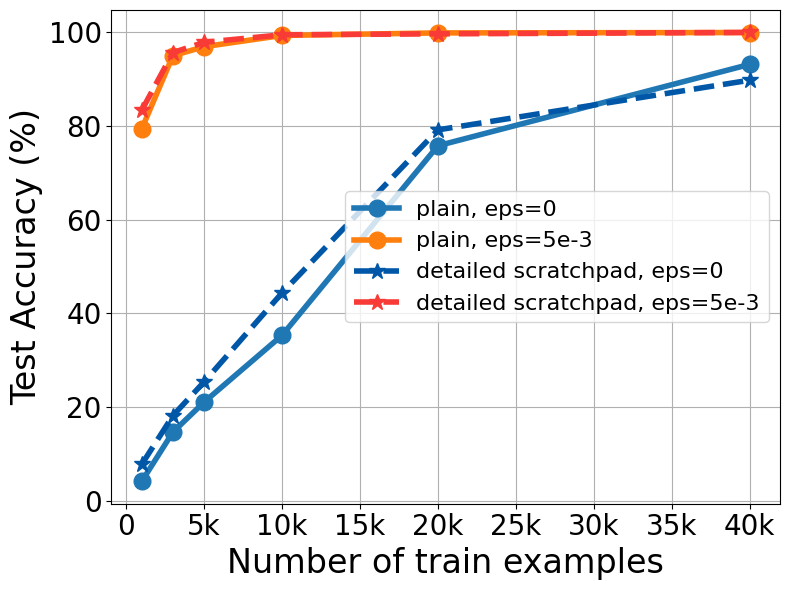

In [49]:
model='nanogpt'
name='sin_sample_efficiency_eps'

methods = ['plain', 'ar']
eps_names = ['','_eps_5e_3']
eps_names = ['Zeroshot'+x for x in eps_names]
# labels = ['plain, eps=0', 'plain, eps=5e-4','plain, eps=5e-3',
# 'detailed scratchpad, eps=0','detailed scratchpad, eps=5e-4','detailed scratchpad, eps=5e-3']
labels = ['plain, eps=0', 'plain, eps=5e-3',
'detailed scratchpad, eps=0','detailed scratchpad, eps=5e-3']


plt.figure(figsize=(8,6))
colors = [colors1[i] for i in [0,1,3]]

files = ['out2/sin/eval_sin_plain_Zeroshot/result.csv', 
# 'out2/sin/eval_sin_plain_Zeroshot_eps_5e_4/result.csv', 
'out2/sin/eval_sin_plain_Zeroshot_eps_5e_3/result.csv', 
'out2/sin_ar/eval_sin_ar_Zeroshot/result.csv', 
# 'out2/sin_ar/eval_sin_ar_Zeroshot_eps_5e_4/result.csv',
'out2/sin_ar/eval_sin_ar_Zeroshot_eps_5e_3/result.csv', 
]

colors = colors1[:2] + colors2[:2]
lines = ['-','-','--','--']
markers = ['o','o','*','*']

print(files)
for i, file in enumerate(files):
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    df.sort_values(by=['num_train_samples'], inplace=True)
    # num_ar = df['num_train_samples'].unique()

    # df_mean = df.groupby('num_train_samples').mean()
    # df_min = df.groupby('num_train_samples').min()
    # df_max = df.groupby('num_train_samples').max()

    plt.plot(df.num_train_samples, df.test_accuracy, label=labels[i], color=colors[i], marker=markers[i], linestyle=lines[i], linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(700, 7000)
# plt.ylim(0, 100)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='center right', fontsize=16)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out2/sin/eval_sin_plain_Zeroshot/result.csv', 'out2/sin/eval_sin_plain_Zeroshot_eps_5e_4/result.csv', 'out2/sin/eval_sin_plain_Zeroshot_eps_5e_3/result.csv', 'out2/sin_ar/eval_sin_ar_Zeroshot/result.csv', 'out2/sin_ar/eval_sin_ar_Zeroshot_eps_5e_4/result.csv', 'out2/sin_ar/eval_sin_ar_Zeroshot_eps_5e_3/result.csv']
out2/sin/eval_sin_plain_Zeroshot/result.csv
out2/sin/eval_sin_plain_Zeroshot_eps_5e_4/result.csv
out2/sin/eval_sin_plain_Zeroshot_eps_5e_3/result.csv
out2/sin_ar/eval_sin_ar_Zeroshot/result.csv
out2/sin_ar/eval_sin_ar_Zeroshot_eps_5e_4/result.csv
out2/sin_ar/eval_sin_ar_Zeroshot_eps_5e_3/result.csv


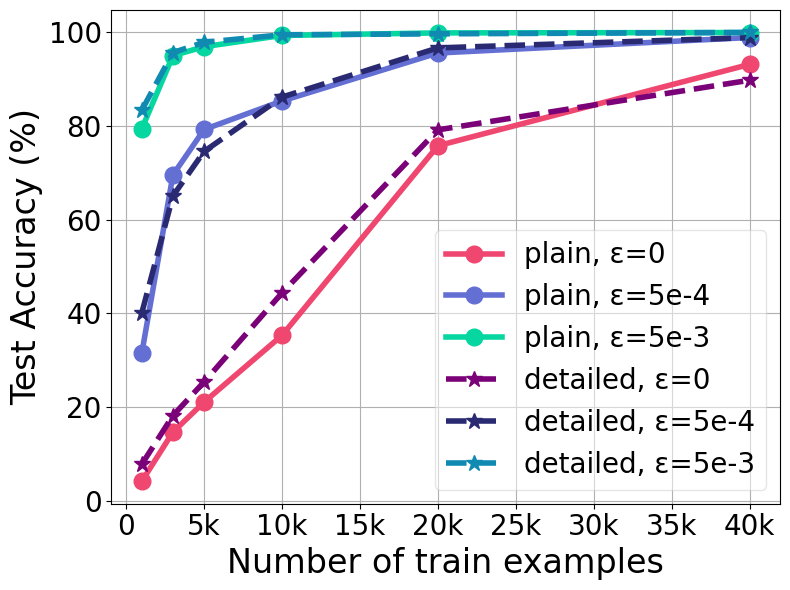

In [4]:
model='nanogpt'
name='sin_sample_efficiency_eps'

methods = ['plain', 'ar']
eps_names = ['Zeroshot'+x for x in ['','_eps_5e_4','_eps_5e_3']]
labels = ['plain, \u03B5=0', 'plain, \u03B5=5e-4','plain, \u03B5=5e-3',
# 'detailed scratchpad, \u03B5=0','detailed scratchpad, \u03B5=5e-4','detailed scratchpad, \u03B5=5e-3']
'detailed, \u03B5=0','detailed, \u03B5=5e-4','detailed, \u03B5=5e-3']

plt.figure(figsize=(8,6))
colors = [colors1[i] for i in [0,1,3]]

files = ['out2/sin/eval_sin_plain_Zeroshot/result.csv', 
'out2/sin/eval_sin_plain_Zeroshot_eps_5e_4/result.csv', 
'out2/sin/eval_sin_plain_Zeroshot_eps_5e_3/result.csv', 
'out2/sin_ar/eval_sin_ar_Zeroshot/result.csv', 
'out2/sin_ar/eval_sin_ar_Zeroshot_eps_5e_4/result.csv',
'out2/sin_ar/eval_sin_ar_Zeroshot_eps_5e_3/result.csv', 
]

colors = ['#EF476F','#646FD4','#06D6A0','#7a0177','#2a2a72','#118AB2']
lines = ['-','-','-','--','--','--']
markers = ['o','o','o','*','*','*']

print(files)
for i, file in enumerate(files):
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    df.sort_values(by=['num_train_samples'], inplace=True)
    # num_ar = df['num_train_samples'].unique()

    # df_mean = df.groupby('num_train_samples').mean()
    # df_min = df.groupby('num_train_samples').min()
    # df_max = df.groupby('num_train_samples').max()

    plt.plot(df.num_train_samples, df.test_accuracy, label=labels[i], color=colors[i], marker=markers[i], linestyle=lines[i], linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(700, 7000)
# plt.ylim(0, 100)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out2/sqrt/eval_sqrt_plain_Zeroshot/result.csv', 'out2/sqrt/eval_sqrt_plain_Zeroshot_eps_5e_4/result.csv', 'out2/sqrt/eval_sqrt_plain_Zeroshot_eps_5e_3/result.csv', 'out2/sqrt_ar/eval_sqrt_ar_Zeroshot/result.csv', 'out2/sqrt_ar/eval_sqrt_ar_Zeroshot_eps_5e_4/result.csv', 'out2/sqrt_ar/eval_sqrt_ar_Zeroshot_eps_5e_3/result.csv']
out2/sqrt/eval_sqrt_plain_Zeroshot/result.csv
out2/sqrt/eval_sqrt_plain_Zeroshot_eps_5e_4/result.csv
out2/sqrt/eval_sqrt_plain_Zeroshot_eps_5e_3/result.csv
out2/sqrt_ar/eval_sqrt_ar_Zeroshot/result.csv
out2/sqrt_ar/eval_sqrt_ar_Zeroshot_eps_5e_4/result.csv
out2/sqrt_ar/eval_sqrt_ar_Zeroshot_eps_5e_3/result.csv


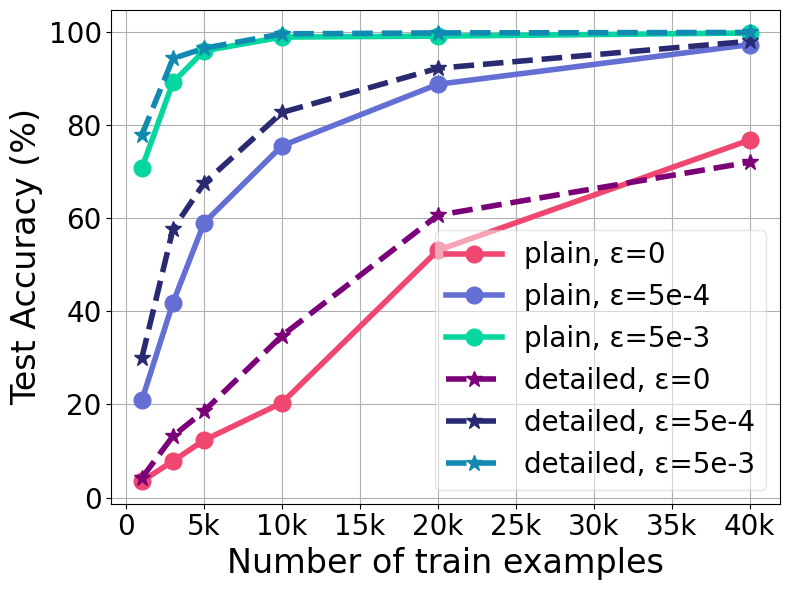

In [5]:
model='nanogpt'
name='sqrt_sample_efficiency_eps'

methods = ['plain', 'ar']
eps_names = ['Zeroshot'+x for x in ['','_eps_5e_4','_eps_5e_3']]
labels = ['plain, \u03B5=0', 'plain, \u03B5=5e-4','plain, \u03B5=5e-3',
# 'detailed scratchpad, \u03B5=0','detailed scratchpad, \u03B5=5e-4','detailed scratchpad, \u03B5=5e-3']
'detailed, \u03B5=0','detailed, \u03B5=5e-4','detailed, \u03B5=5e-3']

plt.figure(figsize=(8,6))

files = ['out2/sqrt/eval_sqrt_plain_Zeroshot/result.csv', 
'out2/sqrt/eval_sqrt_plain_Zeroshot_eps_5e_4/result.csv', 
'out2/sqrt/eval_sqrt_plain_Zeroshot_eps_5e_3/result.csv', 
'out2/sqrt_ar/eval_sqrt_ar_Zeroshot/result.csv', 
'out2/sqrt_ar/eval_sqrt_ar_Zeroshot_eps_5e_4/result.csv',
'out2/sqrt_ar/eval_sqrt_ar_Zeroshot_eps_5e_3/result.csv', 
]

colors = ['#EF476F','#646FD4','#06D6A0','#7a0177','#2a2a72','#118AB2']
lines = ['-','-','-','--','--','--']
markers = ['o','o','o','*','*','*']

print(files)
for i, file in enumerate(files):
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    df.sort_values(by=['num_train_samples'], inplace=True)
    # num_ar = df['num_train_samples'].unique()

    # df_mean = df.groupby('num_train_samples').mean()
    # df_min = df.groupby('num_train_samples').min()
    # df_max = df.groupby('num_train_samples').max()

    plt.plot(df.num_train_samples, df.test_accuracy, label=labels[i], color=colors[i], marker=markers[i], linestyle=lines[i], linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(700, 7000)
# plt.ylim(0, 100)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out2/sin/eval_sin_plain_Zeroshot/result.csv', 'out2/sin_ar/eval_sin_ar_Zeroshot/result.csv']
out2/sin/eval_sin_plain_Zeroshot/result.csv
out2/sin_ar/eval_sin_ar_Zeroshot/result.csv
['out2/sqrt/eval_sqrt_plain_Zeroshot/result.csv', 'out2/sqrt_ar/eval_sqrt_ar_Zeroshot/result.csv']
out2/sqrt/eval_sqrt_plain_Zeroshot/result.csv
out2/sqrt_ar/eval_sqrt_ar_Zeroshot/result.csv


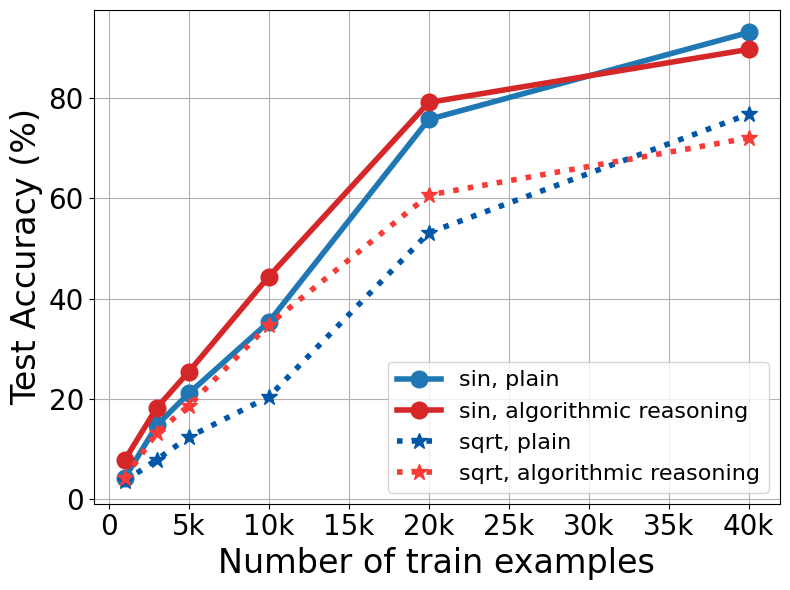

In [4]:
model='nanogpt'
name='sin_sqrt_sample_efficiency'

methods = ['plain', 'ar']
labels = ['plain', 'algorithmic reasoning']
labels = [f'sin, {i}' for i in labels]


plt.figure(figsize=(8,6))
colors = [colors1[i] for i in [0,3]]

files = glob.glob('out2/sin*/eval*Zeroshot/*.csv')
print(files)
for i, method in enumerate(methods):
    file = ''
    for file_check in files:
        if method in file_check:
            file = file_check
            break
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    df.sort_values(by=['num_train_samples'], inplace=True)
    # num_ar = df['num_train_samples'].unique()

    # df_mean = df.groupby('num_train_samples').mean()
    # df_min = df.groupby('num_train_samples').min()
    # df_max = df.groupby('num_train_samples').max()

    plt.plot(df.num_train_samples, df.test_accuracy, label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)

colors = [colors2[i] for i in [0,1]]
labels = ['plain', 'algorithmic reasoning']
labels = [f'sqrt, {i}' for i in labels]

files = glob.glob('out2/sqrt*/eval*Zeroshot/*.csv')
print(files)
for i, method in enumerate(methods):
    file = ''
    for file_check in files:
        if method in file_check:
            file = file_check
            break
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    df.sort_values(by=['num_train_samples'], inplace=True)
    # num_ar = df['num_train_samples'].unique()

    # df_mean = df.groupby('num_train_samples').mean()
    # df_min = df.groupby('num_train_samples').min()
    # df_max = df.groupby('num_train_samples').max()

    plt.plot(df.num_train_samples, df.test_accuracy, label=labels[i], color=colors[i], marker='*', linestyle=":", linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(700, 7000)
# plt.ylim(0, 100)
plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
           ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=16)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out2/subtraction/ar_simple/eval_ar_simple_Zeroshot/result.csv', 'out2/subtraction/ar_simple_randomboth/eval_ar_simple_randomboth_Zeroshot/result.csv', 'out2/subtraction/ar_simple_randomA/eval_ar_simple_randomA_Zeroshot/result.csv', 'out2/subtraction/ar_simple_randomC/eval_ar_simple_randomC_Zeroshot/result.csv']
out2/subtraction/ar_simple/eval_ar_simple_Zeroshot/result.csv
out2/subtraction/ar_simple_randomA/eval_ar_simple_randomA_Zeroshot/result.csv
out2/subtraction/ar_simple_randomC/eval_ar_simple_randomC_Zeroshot/result.csv
out2/subtraction/ar_simple_randomboth/eval_ar_simple_randomboth_Zeroshot/result.csv


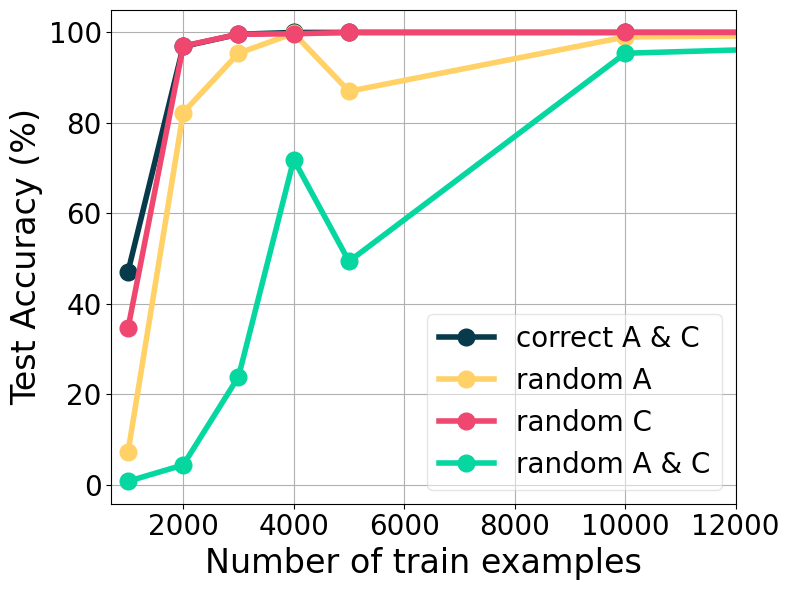

In [96]:
model='nanogpt'
name='subtraction_scratchpad'

methods = ['ar_simple', 'ar_simple_randomA', 'ar_simple_randomC', 'ar_simple_randomboth']
labels =  ["correct A & C", "random A", "random C", "random A & C"]

plt.figure(figsize=(8,6))
colors = colors1

files = glob.glob('out2/subtraction/ar_simple*/eval*Zeroshot/*.csv')
print(files)


for i, method in enumerate(methods):
    file = ''
    for file_check in files:
        if f'/{method}/' in file_check:
            file = file_check
            break
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    df.sort_values(by=['num_train_samples'], inplace=True)
    # num_ar = df['num_train_samples'].unique()

    # df_mean = df.groupby('num_train_samples').mean()
    # df_min = df.groupby('num_train_samples').min()
    # df_max = df.groupby('num_train_samples').max()

    plt.plot(df.num_train_samples, df.test_accuracy, label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(700, 12000)
# plt.ylim(0, 100)
# plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
#            ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

In [42]:
files = glob.glob('out2/addition_mc_reverse/*/*.csv')
print(files)

['out2/addition_mc_reverse/mc_reverse_5000/result.csv', 'out2/addition_mc_reverse/mc_reverse_1200/result.csv', 'out2/addition_mc_reverse/mc_reverse_2000/result.csv', 'out2/addition_mc_reverse/mc_reverse_100/result.csv', 'out2/addition_mc_reverse/mc_reverse_1800/result.csv', 'out2/addition_mc_reverse/mc_reverse_1000/result.csv', 'out2/addition_mc_reverse/mc_reverse_1500/result.csv', 'out2/addition_mc_reverse/mc_reverse_500/result.csv']


['out2/addition_mc/mc_1800/result.csv', 'out2/addition_mc/mc_5000/result.csv', 'out2/addition_mc/mc_1500/result.csv', 'out2/addition_mc/mc_100/result.csv', 'out2/addition_mc/mc_2000/result.csv', 'out2/addition_mc/mc_1000/result.csv', 'out2/addition_mc/mc_1200/result.csv', 'out2/addition_mc/mc_500/result.csv']
out2/addition_mc/mc_100/result.csv
out2/addition_mc/mc_500/result.csv
out2/addition_mc/mc_1000/result.csv
out2/addition_mc/mc_1200/result.csv
out2/addition_mc/mc_1500/result.csv
out2/addition_mc/mc_1800/result.csv
out2/addition_mc/mc_2000/result.csv
out2/addition_mc/mc_5000/result.csv
['out2/addition_mc_reverse/mc_reverse_5000/result.csv', 'out2/addition_mc_reverse/mc_reverse_1200/result.csv', 'out2/addition_mc_reverse/mc_reverse_2000/result.csv', 'out2/addition_mc_reverse/mc_reverse_100/result.csv', 'out2/addition_mc_reverse/mc_reverse_1800/result.csv', 'out2/addition_mc_reverse/mc_reverse_1000/result.csv', 'out2/addition_mc_reverse/mc_reverse_1500/result.csv', 'out2/addition_mc_

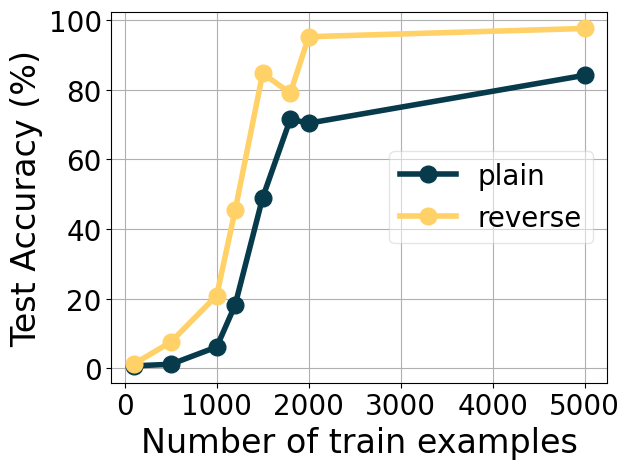

In [97]:
model='nanogpt'
name='addition_2digit_MCdata'

num_samples = [100,500,1000,1200,1500,1800,2000,5000]
labels = ['plain', 'reverse']


files = glob.glob('out2/addition_mc/*/*.csv')
print(files)
max_test_acc_list = []

for i, num_sample in enumerate(num_samples):
    file = ''
    for file_check in files:
        if f'_{num_sample}/' in file_check:
            file = file_check
            break
    print(file)
    df = pd.read_csv(file)
    max_test_acc_list.append(max(df.test_acc))

i=0
plt.plot(np.array(num_samples), np.array(max_test_acc_list), label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)


files = glob.glob('out2/addition_mc_reverse/*/*.csv')
print(files)
max_test_acc_list = []

for i, num_sample in enumerate(num_samples):
    file = ''
    for file_check in files:
        if f'_{num_sample}/' in file_check:
            file = file_check
            break
    print(file)
    df = pd.read_csv(file)
    max_test_acc_list.append(max(df.test_acc))

i=1
plt.plot(np.array(num_samples), np.array(max_test_acc_list), label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(700, 12000)
# plt.ylim(0, 100)
# plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
#            ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='center right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out2/addition_mc/mc_1800/result.csv', 'out2/addition_mc/mc_5000/result.csv', 'out2/addition_mc/mc_1500/result.csv', 'out2/addition_mc/mc_100/result.csv', 'out2/addition_mc/mc_2000/result.csv', 'out2/addition_mc/mc_1000/result.csv', 'out2/addition_mc/mc_1200/result.csv', 'out2/addition_mc/mc_500/result.csv']
out2/addition_mc/mc_100/result.csv
out2/addition_mc/mc_500/result.csv
out2/addition_mc/mc_1000/result.csv
out2/addition_mc/mc_1200/result.csv
out2/addition_mc/mc_1500/result.csv
out2/addition_mc/mc_1800/result.csv
out2/addition_mc/mc_2000/result.csv
out2/addition_mc/mc_5000/result.csv
['out2/addition_mc_reverse/mc_reverse_5000/result.csv', 'out2/addition_mc_reverse/mc_reverse_1200/result.csv', 'out2/addition_mc_reverse/mc_reverse_2000/result.csv', 'out2/addition_mc_reverse/mc_reverse_100/result.csv', 'out2/addition_mc_reverse/mc_reverse_1800/result.csv', 'out2/addition_mc_reverse/mc_reverse_1000/result.csv', 'out2/addition_mc_reverse/mc_reverse_1500/result.csv', 'out2/addition_mc_

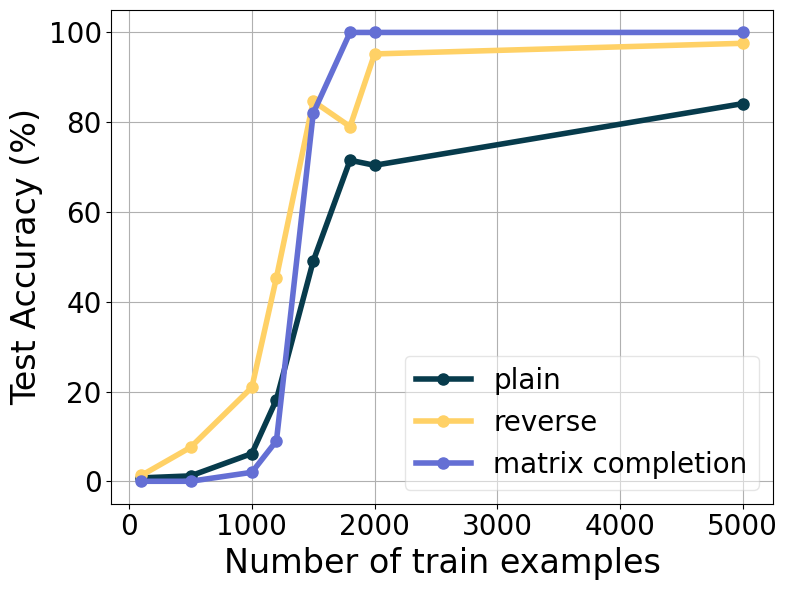

In [5]:
model='nanogpt'
name='addition_2digit_MCdata'

num_samples = [100,500,1000,1200,1500,1800,2000,5000]
labels = ['plain', 'reverse','matrix completion']
colors = ['#073B4C', '#FFD166', '#646FD4']


files = glob.glob('out2/addition_mc/*/*.csv')
print(files)
max_test_acc_list = []

for i, num_sample in enumerate(num_samples):
    file = ''
    for file_check in files:
        if f'_{num_sample}/' in file_check:
            file = file_check
            break
    print(file)
    df = pd.read_csv(file)
    max_test_acc_list.append(max(df.test_acc))

i=0
plt.figure(figsize=(8,6))
plt.plot(np.array(num_samples), np.array(max_test_acc_list), label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=8)


files = glob.glob('out2/addition_mc_reverse/*/*.csv')
print(files)
max_test_acc_list = []

for i, num_sample in enumerate(num_samples):
    file = ''
    for file_check in files:
        if f'_{num_sample}/' in file_check:
            file = file_check
            break
    print(file)
    df = pd.read_csv(file)
    max_test_acc_list.append(max(df.test_acc))

i=1
plt.plot(np.array(num_samples), np.array(max_test_acc_list), label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=8)


file = 'matrix_completion/iterative_mc_results_n=100.csv'
df = pd.read_csv(file)
i=2
plt.plot(df.revealed_entries[:-1], df.success_prob_values[:-1]*100, label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=8)


# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(0, 5000)
# plt.ylim(0, 100)
# plt.xticks([0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000], 
#            ["0", "5k", "10k", "15k", "20k", "25k", "30k", "35k", "40k"], fontsize=20)
plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}2.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out2/addition_plain/addition_plain/result.csv', 'out2-gpt/lr_5e-4_gradaccum_16/addition_plain/plain_10000/result.csv', 'out2-gpt/addition_plain_gpt_tokenizer/plain_gpt_tokenizer_10000/result.csv', 'out2-gpt/addition_plain_gpt_tokenizer_from_pretrained/plain_gpt_tokenizer_from_pretrained_10000_lr1e-4/result.csv', 'out2-gpt/addition_plain_gpt_tokenizer_space/plain_gpt_tokenizer_space_10000/result.csv', 'out2-gpt/addition_plain_gpt_tokenizer_from_pretrained_space/plain_gpt_tokenizer_from_pretrained_space_10000/result.csv']
out2/addition_plain/addition_plain/result.csv
out2-gpt/lr_5e-4_gradaccum_16/addition_plain/plain_10000/result.csv
out2-gpt/addition_plain_gpt_tokenizer/plain_gpt_tokenizer_10000/result.csv
out2-gpt/addition_plain_gpt_tokenizer_from_pretrained/plain_gpt_tokenizer_from_pretrained_10000_lr1e-4/result.csv
out2-gpt/addition_plain_gpt_tokenizer_space/plain_gpt_tokenizer_space_10000/result.csv
out2-gpt/addition_plain_gpt_tokenizer_from_pretrained_space/plain_gpt_tokenizer_fr

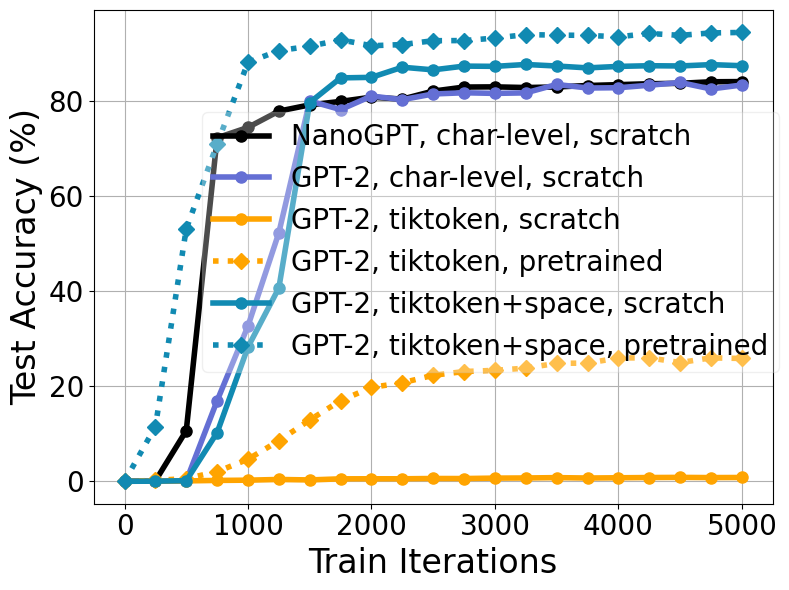

In [10]:
model='gpt2'
name='tokenization'

labels = ['NanoGPT, char-level, scratch','GPT-2, char-level, scratch',
          'GPT-2, tiktoken, scratch', 'GPT-2, tiktoken, pretrained',
          'GPT-2, tiktoken+space, scratch', 'GPT-2, tiktoken+space, pretrained',]

plt.figure(figsize=(8,6))
colors = ['black','#646FD4','#ffa400', '#ffa400', '#118AB2', '#118AB2']

files = [
'out2/addition_plain/addition_plain/result.csv',
'out2-gpt/lr_5e-4_gradaccum_16/addition_plain/plain_10000/result.csv',
'out2-gpt/addition_plain_gpt_tokenizer/plain_gpt_tokenizer_10000/result.csv',
'out2-gpt/addition_plain_gpt_tokenizer_from_pretrained/plain_gpt_tokenizer_from_pretrained_10000_lr1e-4/result.csv',
'out2-gpt/addition_plain_gpt_tokenizer_space/plain_gpt_tokenizer_space_10000/result.csv',
'out2-gpt/addition_plain_gpt_tokenizer_from_pretrained_space/plain_gpt_tokenizer_from_pretrained_space_10000/result.csv',
]
print(files)

for i, file in enumerate(files):
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    marker = 'D' if 'pretrained' in labels[i] else 'o'
    # marker_size = 12 if 'pretrained' in labels[i] else 8
    marker_size=8
    linestyle= ':' if 'pretrained' in labels[i] else '-' 
    plt.plot(df.iter, df.test_acc, label=labels[i], color=colors[i], marker=marker, linestyle=linestyle, linewidth=4, markersize=marker_size)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(700, 7000)
# plt.ylim(0, 100)

plt.xlabel('Train Iterations',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='center right', fontsize=20, framealpha=0.3, bbox_to_anchor=(1.03, 0.53))
# plt.legend(loc='center right', fontsize=18, framealpha=0.5)

plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out2/addition_plain/addition_plain/result.csv', 'out2-gpt/lr_5e-4_gradaccum_16/addition_plain/plain_10000/result.csv', 'out2-gpt/addition_plain_gpt_tokenizer/plain_gpt_tokenizer_10000/result.csv', 'out2-gpt/addition_plain_gpt_tokenizer_from_pretrained/plain_gpt_tokenizer_from_pretrained_10000_lr1e-4/result.csv', 'out2-gpt/addition_plain_gpt_tokenizer_space/plain_gpt_tokenizer_space_10000/result.csv', 'out2-gpt/addition_plain_gpt_tokenizer_from_pretrained_space/plain_gpt_tokenizer_from_pretrained_space_10000/result.csv']
out2/addition_plain/addition_plain/result.csv
out2-gpt/lr_5e-4_gradaccum_16/addition_plain/plain_10000/result.csv
out2-gpt/addition_plain_gpt_tokenizer/plain_gpt_tokenizer_10000/result.csv
out2-gpt/addition_plain_gpt_tokenizer_from_pretrained/plain_gpt_tokenizer_from_pretrained_10000_lr1e-4/result.csv
out2-gpt/addition_plain_gpt_tokenizer_space/plain_gpt_tokenizer_space_10000/result.csv
out2-gpt/addition_plain_gpt_tokenizer_from_pretrained_space/plain_gpt_tokenizer_fr

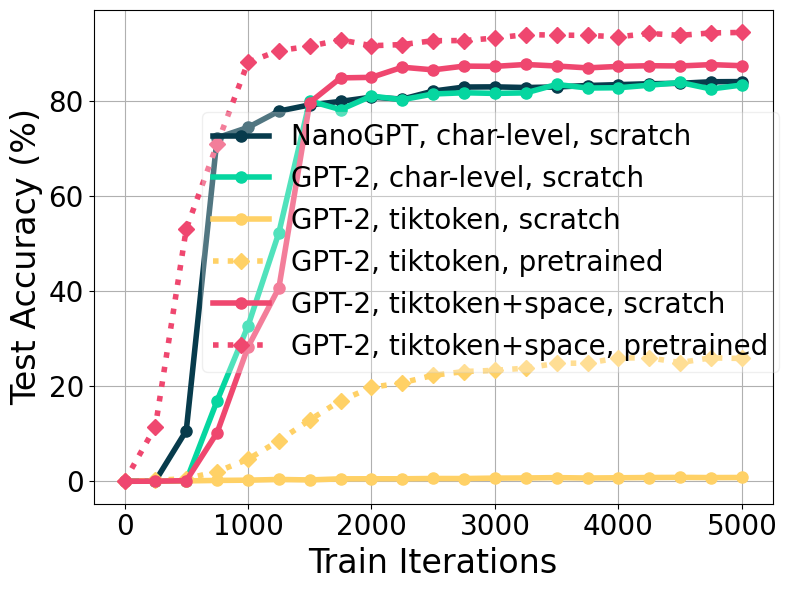

In [14]:
model='gpt2'
name='tokenization'

labels = ['NanoGPT, char-level, scratch','GPT-2, char-level, scratch',
          'GPT-2, tiktoken, scratch', 'GPT-2, tiktoken, pretrained',
          'GPT-2, tiktoken+space, scratch', 'GPT-2, tiktoken+space, pretrained',]

plt.figure(figsize=(8,6))
colors = ['#073B4C','#06D6A0','#FFD166', '#FFD166', '#EF476F', '#EF476F']

files = [
'out2/addition_plain/addition_plain/result.csv',
'out2-gpt/lr_5e-4_gradaccum_16/addition_plain/plain_10000/result.csv',
'out2-gpt/addition_plain_gpt_tokenizer/plain_gpt_tokenizer_10000/result.csv',
'out2-gpt/addition_plain_gpt_tokenizer_from_pretrained/plain_gpt_tokenizer_from_pretrained_10000_lr1e-4/result.csv',
'out2-gpt/addition_plain_gpt_tokenizer_space/plain_gpt_tokenizer_space_10000/result.csv',
'out2-gpt/addition_plain_gpt_tokenizer_from_pretrained_space/plain_gpt_tokenizer_from_pretrained_space_10000/result.csv',
]
print(files)

for i, file in enumerate(files):
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    marker = 'D' if 'pretrained' in labels[i] else 'o'
    # marker_size = 12 if 'pretrained' in labels[i] else 8
    marker_size=8
    linestyle= ':' if 'pretrained' in labels[i] else '-' 
    plt.plot(df.iter, df.test_acc, label=labels[i], color=colors[i], marker=marker, linestyle=linestyle, linewidth=4, markersize=marker_size)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(700, 7000)
# plt.ylim(0, 100)

plt.xlabel('Train Iterations',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='center right', fontsize=20, framealpha=0.3, bbox_to_anchor=(1.03, 0.53))
# plt.legend(loc='center right', fontsize=18, framealpha=0.5)

plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out2-gpt/lr_5e-4_gradaccum_8/addition_plain/eval_plain_Zeroshot/result.csv', 'out2-gpt/lr_5e-4_gradaccum_8/addition_reverse/eval_reverse_Zeroshot/result.csv', 'out2-gpt/lr_5e-4_gradaccum_8/addition_ar/eval_ar_Zeroshot/result.csv']
out2-gpt/lr_5e-4_gradaccum_8/addition_plain/eval_plain_Zeroshot/result.csv
out2-gpt/lr_5e-4_gradaccum_8/addition_reverse/eval_reverse_Zeroshot/result.csv
out2-gpt/lr_5e-4_gradaccum_8/addition_ar/eval_ar_Zeroshot/result.csv


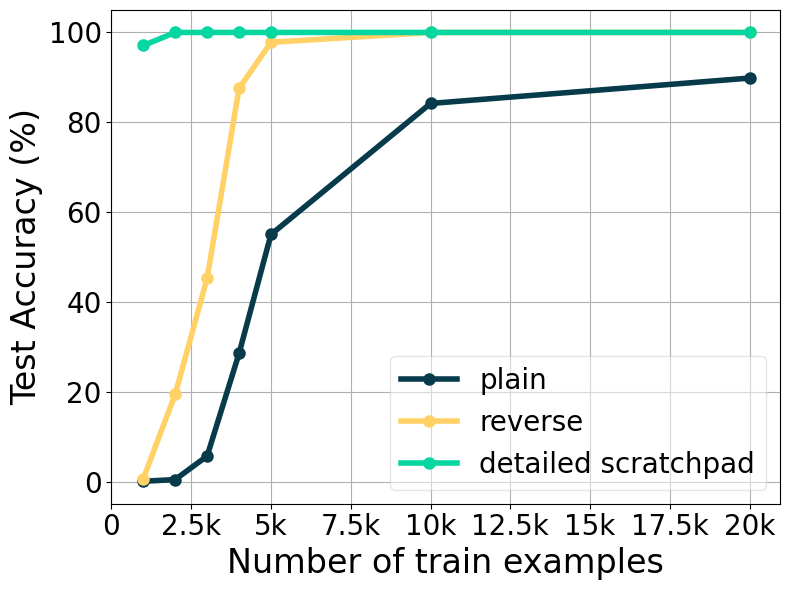

In [100]:
model='gpt2'
name='sample_efficiency'

files = [
    'out2-gpt/lr_5e-4_gradaccum_8/addition_plain/eval_plain_Zeroshot/result.csv',
    'out2-gpt/lr_5e-4_gradaccum_8/addition_reverse/eval_reverse_Zeroshot/result.csv',
    'out2-gpt/lr_5e-4_gradaccum_8/addition_ar/eval_ar_Zeroshot/result.csv',
]


labels = ['plain','reverse','detailed scratchpad']

plt.figure(figsize=(8,6))
colors = [colors1[0],colors1[1],colors1[3],]

print(files)

for i, file in enumerate(files):
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    df.sort_values(by=['num_train_samples'], inplace=True)
    plt.plot(df.num_train_samples, df.test_accuracy, label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=8)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(700, 7000)
# plt.ylim(0, 100)

plt.xticks([0,2500,5000,7500,10000,12500,15000,17500,20000], 
           ["0","2.5k","5k","7.5k","10k","12.5k","15k","17.5k","20k"], fontsize=20)


plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out2-gpt/lr_1e-3/addition_plain/eval_plain_Zeroshot/result.csv', 'out2-gpt/lr_5e-4_gradaccum_8/addition_plain/eval_plain_Zeroshot/result.csv', 'out2-gpt/lr_5e-4_gradaccum_16/addition_plain/eval_plain_Zeroshot/result.csv', 'out2-gpt/lr_1e-3/addition_reverse/eval_reverse_Zeroshot/result.csv', 'out2-gpt/lr_5e-4_gradaccum_8/addition_reverse/eval_reverse_Zeroshot/result.csv', 'out2-gpt/lr_5e-4_gradaccum_16/addition_reverse/eval_reverse_Zeroshot/result.csv', 'out2-gpt/lr_1e-3/addition_ar/eval_ar_Zeroshot/result.csv', 'out2-gpt/lr_5e-4_gradaccum_8/addition_ar/eval_ar_Zeroshot/result.csv']
out2-gpt/lr_1e-3/addition_plain/eval_plain_Zeroshot/result.csv
out2-gpt/lr_5e-4_gradaccum_8/addition_plain/eval_plain_Zeroshot/result.csv
out2-gpt/lr_5e-4_gradaccum_16/addition_plain/eval_plain_Zeroshot/result.csv
out2-gpt/lr_1e-3/addition_reverse/eval_reverse_Zeroshot/result.csv
out2-gpt/lr_5e-4_gradaccum_8/addition_reverse/eval_reverse_Zeroshot/result.csv
out2-gpt/lr_5e-4_gradaccum_16/addition_reverse/ev

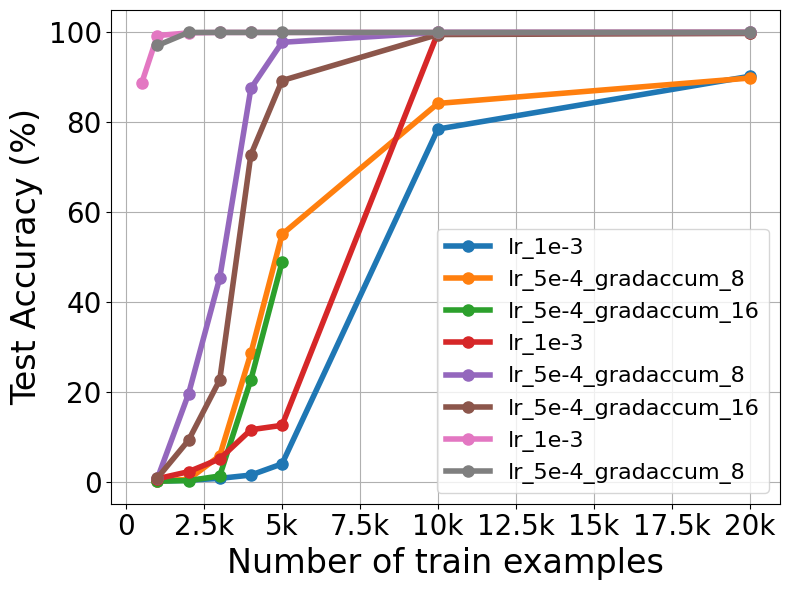

In [6]:
model='gpt2'
name='sample_efficiency'

files = [
    'out2-gpt/lr_1e-3/addition_plain/eval_plain_Zeroshot/result.csv',
    'out2-gpt/lr_5e-4_gradaccum_8/addition_plain/eval_plain_Zeroshot/result.csv',
    'out2-gpt/lr_5e-4_gradaccum_16/addition_plain/eval_plain_Zeroshot/result.csv',
    'out2-gpt/lr_1e-3/addition_reverse/eval_reverse_Zeroshot/result.csv',
    'out2-gpt/lr_5e-4_gradaccum_8/addition_reverse/eval_reverse_Zeroshot/result.csv',
    'out2-gpt/lr_5e-4_gradaccum_16/addition_reverse/eval_reverse_Zeroshot/result.csv',
    'out2-gpt/lr_1e-3/addition_ar/eval_ar_Zeroshot/result.csv',
    'out2-gpt/lr_5e-4_gradaccum_8/addition_ar/eval_ar_Zeroshot/result.csv',
]


# labels = ['plain','reverse','detailed scratchpad']

plt.figure(figsize=(8,6))
colors = colors1

print(files)

for i, file in enumerate(files):
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    df.sort_values(by=['num_train_samples'], inplace=True)
    plt.plot(df.num_train_samples, df.test_accuracy, label=file.split('/')[1], color=colors[i], marker='o', linewidth=4, markersize=8)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(700, 7000)
# plt.ylim(0, 100)

plt.xticks([0,2500,5000,7500,10000,12500,15000,17500,20000], 
           ["0","2.5k","5k","7.5k","10k","12.5k","15k","17.5k","20k"], fontsize=20)


plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=16)
plt.grid(True)
plt.tight_layout()



['out2-gpt/lr_5e-4_gradaccum_8/addition_plain/eval_plain_Zeroshot_1/result.csv', 'out2-gpt/lr_5e-4_gradaccum_8/addition_reverse/eval_reverse_Zeroshot/result.csv', 'out2-gpt/lr_5e-4_gradaccum_8/addition_ar/eval_ar_Zeroshot/result.csv']
out2-gpt/lr_5e-4_gradaccum_8/addition_plain/eval_plain_Zeroshot_1/result.csv
out2-gpt/lr_5e-4_gradaccum_8/addition_reverse/eval_reverse_Zeroshot/result.csv
out2-gpt/lr_5e-4_gradaccum_8/addition_ar/eval_ar_Zeroshot/result.csv


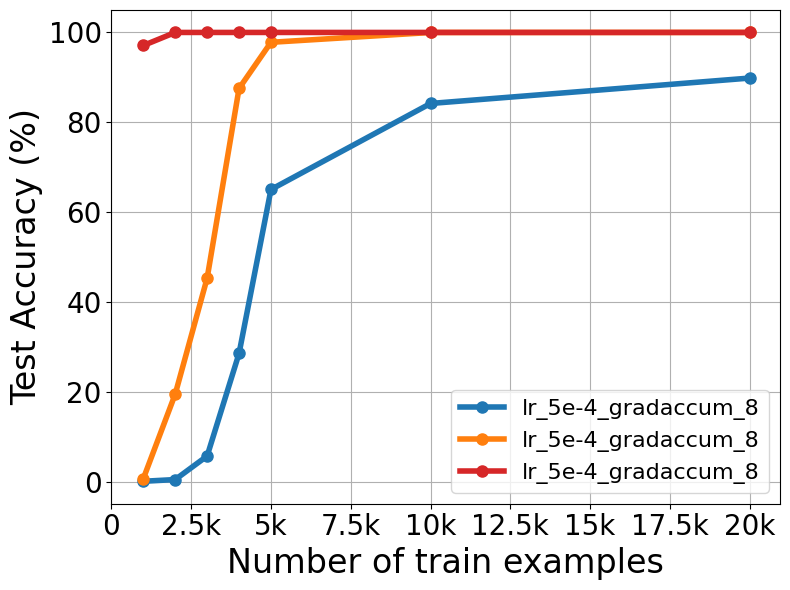

In [34]:
model='gpt2'
name='sample_efficiency'

labels = ['plain','reverse','detailed scratchpad']

files = [
    'out2-gpt/lr_5e-4_gradaccum_8/addition_plain/eval_plain_Zeroshot_1/result.csv',
    'out2-gpt/lr_5e-4_gradaccum_8/addition_reverse/eval_reverse_Zeroshot/result.csv',
    'out2-gpt/lr_5e-4_gradaccum_8/addition_ar/eval_ar_Zeroshot/result.csv',
]


# labels = ['plain','reverse','detailed scratchpad']

plt.figure(figsize=(8,6))
colors = [colors1[0],colors1[1],colors1[3],]

print(files)

for i, file in enumerate(files):
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    df.sort_values(by=['num_train_samples'], inplace=True)
    plt.plot(df.num_train_samples, df.test_accuracy, label=file.split('/')[1], color=colors[i], marker='o', linewidth=4, markersize=8)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(700, 7000)
# plt.ylim(0, 100)

plt.xticks([0,2500,5000,7500,10000,12500,15000,17500,20000], 
           ["0","2.5k","5k","7.5k","10k","12.5k","15k","17.5k","20k"], fontsize=20)


plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=16)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out2-gpt/lr_5e-4_gradaccum_8/addition_plain/eval_plain_Zeroshot_1/result.csv', 'out2-gpt/lr_5e-4_gradaccum_8/addition_reverse/eval_reverse_Zeroshot/result.csv', 'out2-gpt/lr_5e-4_gradaccum_8/addition_ar/eval_ar_Zeroshot/result.csv']
out2-gpt/lr_5e-4_gradaccum_8/addition_plain/eval_plain_Zeroshot_1/result.csv
out2-gpt/lr_5e-4_gradaccum_8/addition_reverse/eval_reverse_Zeroshot/result.csv
out2-gpt/lr_5e-4_gradaccum_8/addition_ar/eval_ar_Zeroshot/result.csv


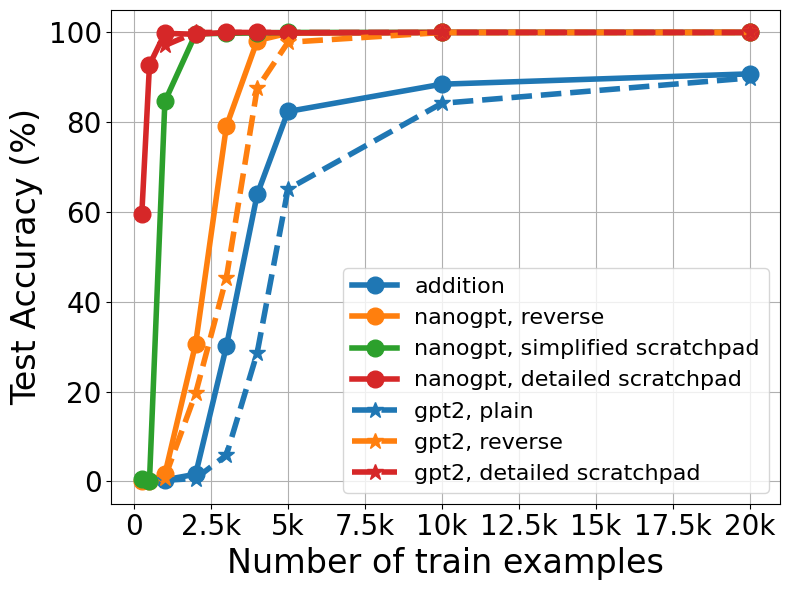

In [35]:
model='nanogpt_gpt2'
name='sample_efficiency'

labels = ['addition', 'reverse', 'simplified scratchpad', 'algorithmic reasoning']
names = ['nanogpt, '+x for x in ['addition', 'reverse', 'simplified scratchpad', 'detailed scratchpad']]

plt.figure(figsize=(8,6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

file = 'plots/sample_efficiency.csv'
df = pd.read_csv('plots/sample_efficiency.csv')
keys = df.keys()
num_ar = df['num_train_samples'].unique()


for i, label in enumerate(labels):
    if i ==0:
        df = pd.read_csv('out/out-addition-bal/eval_add-bal_Zeroshot/result.csv')
        plt.plot(df['num_train_samples'][:-1], df['test_accuracy'][:-1], label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    else:
        df = pd.read_csv(f'{file}')
        df_mean = df.groupby('num_train_samples').mean()
        df_min = df.groupby('num_train_samples').min()
        df_max = df.groupby('num_train_samples').max()

        plt.plot(df_mean.index, df_mean[f'{label}'], label=names[i], color=colors[i], marker='o', linewidth=4, markersize=12)


files = [
    'out2-gpt/lr_5e-4_gradaccum_8/addition_plain/eval_plain_Zeroshot_1/result.csv',
    'out2-gpt/lr_5e-4_gradaccum_8/addition_reverse/eval_reverse_Zeroshot/result.csv',
    'out2-gpt/lr_5e-4_gradaccum_8/addition_ar/eval_ar_Zeroshot/result.csv',
]


labels = ['plain','reverse','detailed scratchpad']
labels = ['gpt2, '+ x for x in labels]

colors = [colors1[0],colors1[1],colors1[3],]

print(files)

for i, file in enumerate(files):
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    df.sort_values(by=['num_train_samples'], inplace=True)
    plt.plot(df.num_train_samples, df.test_accuracy, label=labels[i], color=colors[i], marker='*', linestyle='--', linewidth=4, markersize=12)



# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(700, 7000)
# plt.ylim(0, 100)

plt.xticks([0,2500,5000,7500,10000,12500,15000,17500,20000], 
           ["0","2.5k","5k","7.5k","10k","12.5k","15k","17.5k","20k"], fontsize=20)


plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=16)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out2-gpt/addition_plain/eval_plain_Zeroshot/result.csv', 'out2-gpt/addition_reverse/eval_reverse_Zeroshot/result.csv', 'out2-gpt/addition_ar/eval_ar_Zeroshot/result.csv']
out2-gpt/addition_plain/eval_plain_Zeroshot/result.csv
out2-gpt/addition_reverse/eval_reverse_Zeroshot/result.csv
out2-gpt/addition_ar/eval_ar_Zeroshot/result.csv


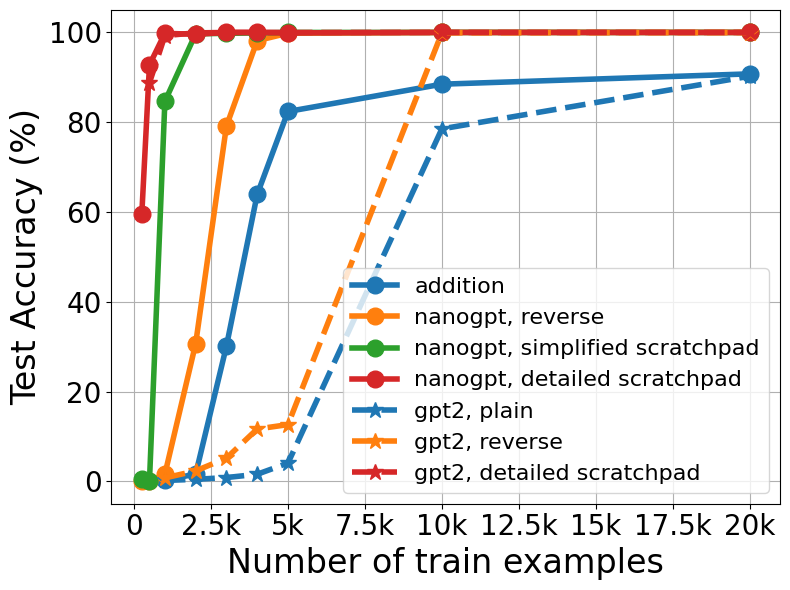

In [10]:
model='nanogpt_gpt2'
name='sample_efficiency'

labels = ['addition', 'reverse', 'simplified scratchpad', 'algorithmic reasoning']
names = ['nanogpt, '+x for x in ['addition', 'reverse', 'simplified scratchpad', 'detailed scratchpad']]

plt.figure(figsize=(8,6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

file = 'plots/sample_efficiency.csv'
df = pd.read_csv('plots/sample_efficiency.csv')
keys = df.keys()
num_ar = df['num_train_samples'].unique()


for i, label in enumerate(labels):
    if i ==0:
        df = pd.read_csv('out/out-addition-bal/eval_add-bal_Zeroshot/result.csv')
        plt.plot(df['num_train_samples'][:-1], df['test_accuracy'][:-1], label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)
    else:
        df = pd.read_csv(f'{file}')
        df_mean = df.groupby('num_train_samples').mean()
        df_min = df.groupby('num_train_samples').min()
        df_max = df.groupby('num_train_samples').max()

        plt.plot(df_mean.index, df_mean[f'{label}'], label=names[i], color=colors[i], marker='o', linewidth=4, markersize=12)


files = [
    'out2-gpt/addition_plain/eval_plain_Zeroshot/result.csv',
    'out2-gpt/addition_reverse/eval_reverse_Zeroshot/result.csv',
    'out2-gpt/addition_ar/eval_ar_Zeroshot/result.csv',
]


labels = ['plain','reverse','detailed scratchpad']
labels = ['gpt2, '+ x for x in labels]

colors = [colors1[0],colors1[1],colors1[3],]

print(files)

for i, file in enumerate(files):
    print(file)
    df = pd.read_csv(file)
    keys = df.keys()
    df.sort_values(by=['num_train_samples'], inplace=True)
    plt.plot(df.num_train_samples, df.test_accuracy, label=labels[i], color=colors[i], marker='*', linestyle='--', linewidth=4, markersize=12)



# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(700, 7000)
# plt.ylim(0, 100)

plt.xticks([0,2500,5000,7500,10000,12500,15000,17500,20000], 
           ["0","2.5k","5k","7.5k","10k","12.5k","15k","17.5k","20k"], fontsize=20)


plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=16)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/{model}_{name}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)

['out2/addition_reverse/eval_$-rev-bal_samplenum/result.csv', 'out2/addition_reverse2/eval_$-rev2-bal_samplenum/result.csv']


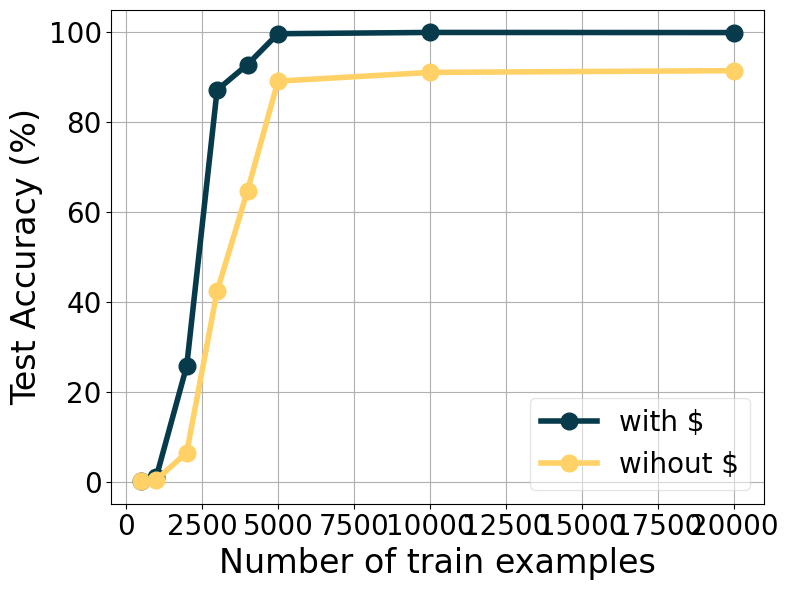

In [4]:
model='nanogpt'
labels = ['with $', 'wihout $']#,'with $, orig',]
names = ['with $', 'wihout $']#, 'with $, orig',]

plt.figure(figsize=(8,6))
colors = colors1

csv_list = [
    'out2/addition_reverse/eval_$-rev-bal_samplenum/result.csv',
    'out2/addition_reverse2/eval_$-rev2-bal_samplenum/result.csv',
]
print(csv_list)

df = pd.read_csv(csv_list[0])
keys = df.keys()
num_ar = df['num_train_samples'].unique()


for i, file in enumerate(csv_list):
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_train_samples').mean()
    df_min = df.groupby('num_train_samples').min()
    df_max = df.groupby('num_train_samples').max()

    plt.plot(df_mean.index, df_mean[f'test_accuracy'], label=names[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# df = pd.read_csv('plots/sample_efficiency.csv')
# df_mean = df.groupby('num_train_samples').mean()
# plt.plot(df['num_train_samples'], df['reverse'], label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)


# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(0, 7000)
# plt.ylim(0, 100)
plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

['out2/addition_plain2/eval-bal2_samplenum/result.csv', 'out2/addition_plain/eval-bal_samplenum/result.csv']


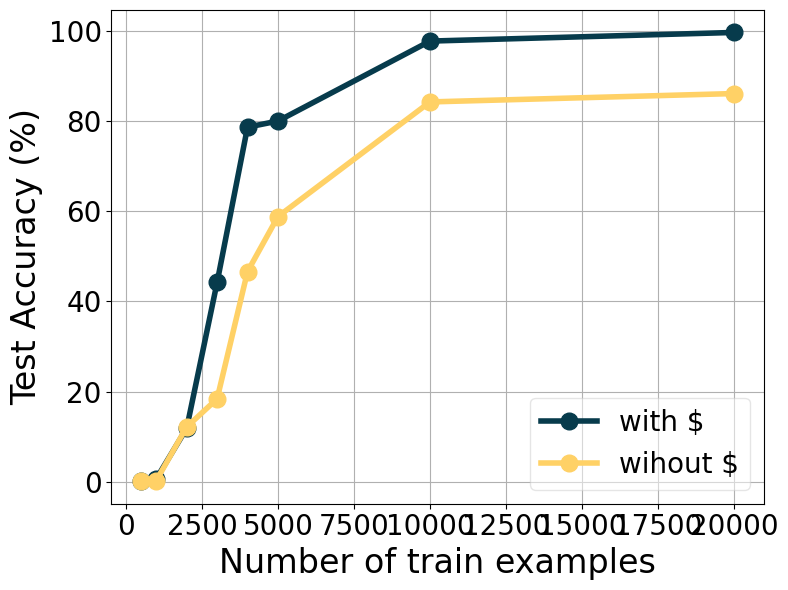

In [7]:
model='nanogpt'
labels = ['with $', 'wihout $']#,'with $, orig',]
names = ['with $', 'wihout $']#, 'with $, orig',]

plt.figure(figsize=(8,6))
colors = colors1

csv_list = [
    'out2/addition_plain2/eval-bal2_samplenum/result.csv',
    'out2/addition_plain/eval-bal_samplenum/result.csv',
]
print(csv_list)

df = pd.read_csv(csv_list[0])
keys = df.keys()
num_ar = df['num_train_samples'].unique()


for i, file in enumerate(csv_list):
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_train_samples').mean()
    df_min = df.groupby('num_train_samples').min()
    df_max = df.groupby('num_train_samples').max()

    plt.plot(df_mean.index, df_mean[f'test_accuracy'], label=names[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# df = pd.read_csv('plots/sample_efficiency.csv')
# df_mean = df.groupby('num_train_samples').mean()
# plt.plot(df['num_train_samples'], df['reverse'], label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)


# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(0, 7000)
# plt.ylim(0, 100)
plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

['out2/addition_reverse/eval_$-rev-bal_samplenum/result.csv', 'out2/addition_reverse2/eval_$-rev2-bal_samplenum/result.csv', 'out2/addition_plain2/eval-bal2_samplenum/result.csv', 'out2/addition_plain/eval-bal_samplenum/result.csv']


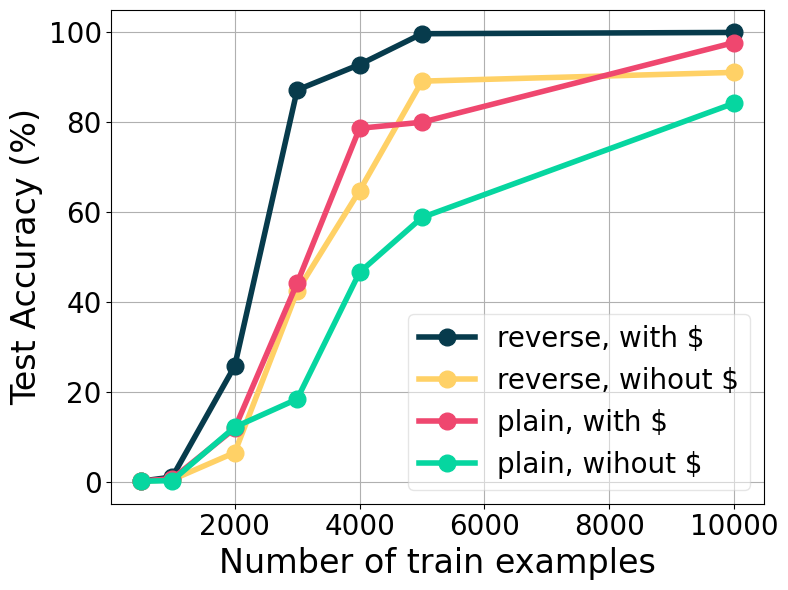

In [25]:
model='nanogpt'
labels = ['reverse, with $', 'reverse, wihout $','plain, with $', 'plain, wihout $',]#,'with $, orig',]
names = ['reverse, with $', 'reverse, wihout $','plain, with $', 'plain, wihout $',]

plt.figure(figsize=(8,6))
colors = colors1

csv_list = [
    'out2/addition_reverse/eval_$-rev-bal_samplenum/result.csv',
    'out2/addition_reverse2/eval_$-rev2-bal_samplenum/result.csv',
    'out2/addition_plain2/eval-bal2_samplenum/result.csv',
    'out2/addition_plain/eval-bal_samplenum/result.csv',
]
print(csv_list)

df = pd.read_csv(csv_list[0])
keys = df.keys()
num_ar = df['num_train_samples'].unique()


for i, file in enumerate(csv_list):
    df = pd.read_csv(f'{file}')
    df_mean = df.groupby('num_train_samples').mean()
    df_min = df.groupby('num_train_samples').min()
    df_max = df.groupby('num_train_samples').max()

    plt.plot(df_mean.index[:-1], df_mean[f'test_accuracy'][:-1], label=names[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# df = pd.read_csv('plots/sample_efficiency.csv')
# df_mean = df.groupby('num_train_samples').mean()
# plt.plot(df['num_train_samples'], df['reverse'], label=labels[i], color=colors[i], marker='o', linewidth=4, markersize=12)

# plt.title("NanoGPT, Algorithmic Reasoning Accuracy", fontsize=20)
# plt.margins(x=0.05)  
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim([0, 10000])
# plt.ylim(0, 100)
plt.xlabel('Number of train examples',fontsize=24)
plt.ylabel('Test Accuracy (%)',fontsize=24)
plt.legend(loc='lower right', fontsize=20, framealpha=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(f'figs/nanogpt_dollarpad.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.0)